### Análisis de fuga de clientes

In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.offline as py
import plotly.graph_objs as go
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE


### Leemos el dataframe y realizamos un primer análisis

In [83]:
#Lectura del DataFrame
df = pd.read_csv(r'C:\Users\Diana\Desktop\Formacion\dsft-jun23-Diana\3_Machine_learning\entregable\Machine_Learning\Churn_Modelling.csv', sep = ",")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [84]:
# Estadísticos
df.describe(include='all')

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  10000.000000   10000.000000   10000.000000  10000.00000   
unique           NaN           NaN            NaN            NaN          NaN   
top              NaN           NaN            NaN            NaN          NaN   
freq             NaN           NaN            NaN            NaN          NaN   
mean       38.921800      5.012800   76485.889288       1.530200      0.70550   
std        10.487806      2.892174   62397.405202       0.581654      0.45584   
min        18.000000      0.000000       0.000000       1.000000      0.00000   
25%        32.000000      3.000000       0.000000       1.000000      0.00000   
50%        37.000000      5.000000   97198.540000       1.000000      1.00000   
75%        44.000000      7.000000  127644.240000       2.000000      1.00000   
max        92.000000     10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary        Exited  
count     10000.000000     10000.000000  10000.000000  
unique             NaN              NaN           NaN  
top                NaN              NaN           NaN  
freq               NaN              NaN           NaN  
mean          0.515100    100090.239881      0.203700  
std           0.499797     57510.492818      0.402769  
min           0.000000        11.580000      0.000000  
25%           0.000000     51002.110000      0.000000  
50%           1.000000    100193.915000      0.000000  
75%           1.000000    149388.247500      0.000000  
max           1.000000    199992.480000      1.000000

In [85]:
# Tipos de los datos y missings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [86]:
# Columnas del dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [87]:
# dimensiones del dataset
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 10000
Columnas: 14


Primer análisis de los datos:

Con este primer análisis podemos ver que tenemos suficientes filas y columnas para poder predecir la huida de clientes. En total tenemos 14 columnas tanto categóricas como numéricas y 10.000 observaciones.
Por lo que sí podemos continuar con nuestro análisis.
Por otro lado, vemos que determinadas columnas que son categóricas están siendo leídas como numéricas, lo que nos llevará a cambiar el tipo de dato en las mismas. Sería el caso de CustomerId.
Lo cambiamos a continuación. Vemos columnas que tampoco vamos a necesitar en el análisis como RowNumber y lo eliminamos. Nos quedamos con 13 columnas y continuamos con el análisis.


In [88]:
#Cambiamos el tipo de dato de la columna CustomerId a object
df['CustomerId'] = df['CustomerId'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  object 
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


In [89]:
df.drop(columns='RowNumber', inplace=True)


In [90]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [91]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(df)

COL_N         CustomerId Surname CreditScore Geography  Gender    Age Tenure  \
DATA_TYPE         object  object       int64    object  object  int64  int64   
MISSINGS (%)         0.0     0.0         0.0       0.0     0.0    0.0    0.0   
UNIQUE_VALUES      10000    2932         460         3       2     70     11   
CARDIN (%)         100.0   29.32         4.6      0.03    0.02    0.7   0.11   

COL_N          Balance NumOfProducts HasCrCard IsActiveMember EstimatedSalary  \
DATA_TYPE      float64         int64     int64          int64         float64   
MISSINGS (%)       0.0           0.0       0.0            0.0             0.0   
UNIQUE_VALUES     6382             4         2              2            9999   
CARDIN (%)       63.82          0.04      0.02           0.02           99.99   

COL_N         Exited  
DATA_TYPE      int64  
MISSINGS (%)     0.0  
UNIQUE_VALUES      2  
CARDIN (%)      0.02

No habíamos caído antes, pero tampoco nos aporta nada el id de cliente ni el nombre. Vamos a eliminar las columnas CustomerId y Surname.

In [92]:
df.drop(columns=['CustomerId','Surname'], inplace=True)

In [93]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [94]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(df)

COL_N         CreditScore Geography  Gender    Age Tenure  Balance  \
DATA_TYPE           int64    object  object  int64  int64  float64   
MISSINGS (%)          0.0       0.0     0.0    0.0    0.0      0.0   
UNIQUE_VALUES         460         3       2     70     11     6382   
CARDIN (%)            4.6      0.03    0.02    0.7   0.11    63.82   

COL_N         NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited  
DATA_TYPE             int64     int64          int64         float64  int64  
MISSINGS (%)            0.0       0.0            0.0             0.0    0.0  
UNIQUE_VALUES             4         2              2            9999      2  
CARDIN (%)             0.04      0.02           0.02           99.99   0.02

In [95]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [96]:
df.eq(0).sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure              413
Balance            3617
NumOfProducts         0
HasCrCard          2945
IsActiveMember     4849
EstimatedSalary       0
Exited             7963
dtype: int64

In [469]:
exited_counts = df['Exited'].value_counts()
exited_counts

Exited
0    7963
1    2037
Name: count, dtype: int64

Con el análisis anterior, vemos que no hay missings ni nulos, pero sí hemos encontrado 0. En el caso de las columnas HasCrCard, IsActiveMember y Exited es normal porque las tres columnas tienen solamente 2 valores 0 y 1. Sin embargo en las columnas Tenure y Balance, las dos tienen valores 0. Entendemos que en el caso del Balance es normal, ya que existen balances cuentas que puede ser 0.
Otra cosa importante que hemos averiguado con el análisis es que no tenemos valores duplicados al tener ids de clientes únicos igual al número total de observaciones.

El modelo está desbalanceado, por lo que hemos observado antes cuando analizamos los valores 0, vemos que el target tiene 7963 valores 0 y 2037  1s.

### Dividimos datos en train y test para poder hacer el EDA

In [352]:
X_df = df.iloc[:,:-1]
y_df = df.iloc[:,-1]

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df,y_df, test_size=0.2, random_state= 42)

In [355]:
print("Rango de X_train_df", X_train_df.shape)
print("Rango de X_test_df", X_test_df.shape)
print("Rango de y_train_df", y_train_df.shape)
print("Rango de y_test_df", y_test_df.shape)

Rango de X_train_df (8000, 10)
Rango de X_test_df (2000, 10)
Rango de y_train_df (8000,)
Rango de y_test_df (2000,)


### EDA con los datos de train

A continución, vamos a reliazar el EDA con los datos de train y más adelante, antes de modelar, balancearemos los datos de train.

In [356]:
def data_report(data_frame):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(X_train_df)

COL_N         CreditScore Geography  Gender    Age Tenure  Balance  \
DATA_TYPE           int64    object  object  int64  int64  float64   
MISSINGS (%)          0.0       0.0     0.0    0.0    0.0      0.0   
UNIQUE_VALUES         460         3       2     70     11     6382   
CARDIN (%)            4.6      0.03    0.02    0.7   0.11    63.82   

COL_N         NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited  
DATA_TYPE             int64     int64          int64         float64  int64  
MISSINGS (%)            0.0       0.0            0.0             0.0    0.0  
UNIQUE_VALUES             4         2              2            9999      2  
CARDIN (%)             0.04      0.02           0.02           99.99   0.02

In [357]:
# Calculamos los estadísticos necesarios para el análisis en X_train
estadisticos = X_train_df[['CreditScore', 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].agg(['mean', 'median', 'var', 'min', 'max'])
moda = X_train_df[['CreditScore', 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].mode().iloc[0]
resultados = pd.DataFrame({
    'Mean': estadisticos.loc['mean'],
    'Median': estadisticos.loc['median'],
    'Variance': estadisticos.loc['var'],
    'Min': estadisticos.loc['min'],
    'Max': estadisticos.loc['max'],
    'Moda': moda})

tabla_Resultados = pd.DataFrame(resultados)
tabla_Resultados


Mean     Median      Variance     Min        Max  \
CreditScore         651.647625     653.00  9.286445e+03  350.00     850.00   
Age                  38.897750      37.00  1.106484e+02   18.00      92.00   
Tenure                5.003875       5.00  8.304898e+00    0.00      10.00   
Balance           76102.139645   96447.52  3.901377e+09    0.00  250898.09   
NumOfProducts         1.531375       1.00  3.360576e-01    1.00       4.00   
HasCrCard             0.703500       1.00  2.086138e-01    0.00       1.00   
IsActiveMember        0.512750       1.00  2.498687e-01    0.00       1.00   
EstimatedSalary  100431.289764  100487.72  3.308426e+09   90.07  199970.74   

                     Moda  
CreditScore        850.00  
Age                 37.00  
Tenure               2.00  
Balance              0.00  
NumOfProducts        1.00  
HasCrCard            1.00  
IsActiveMember       1.00  
EstimatedSalary  24924.92

In [358]:
moda = X_train_df[['Geography','Gender']].mode().iloc[0]
moda

Geography    France
Gender         Male
Name: 0, dtype: object

### Visualización general de las variables

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\4118688816.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\4118688816.py:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\4118688816.py:24: UserWarning:



`distplot` 

<Axes: xlabel='Exited', ylabel='Density'>

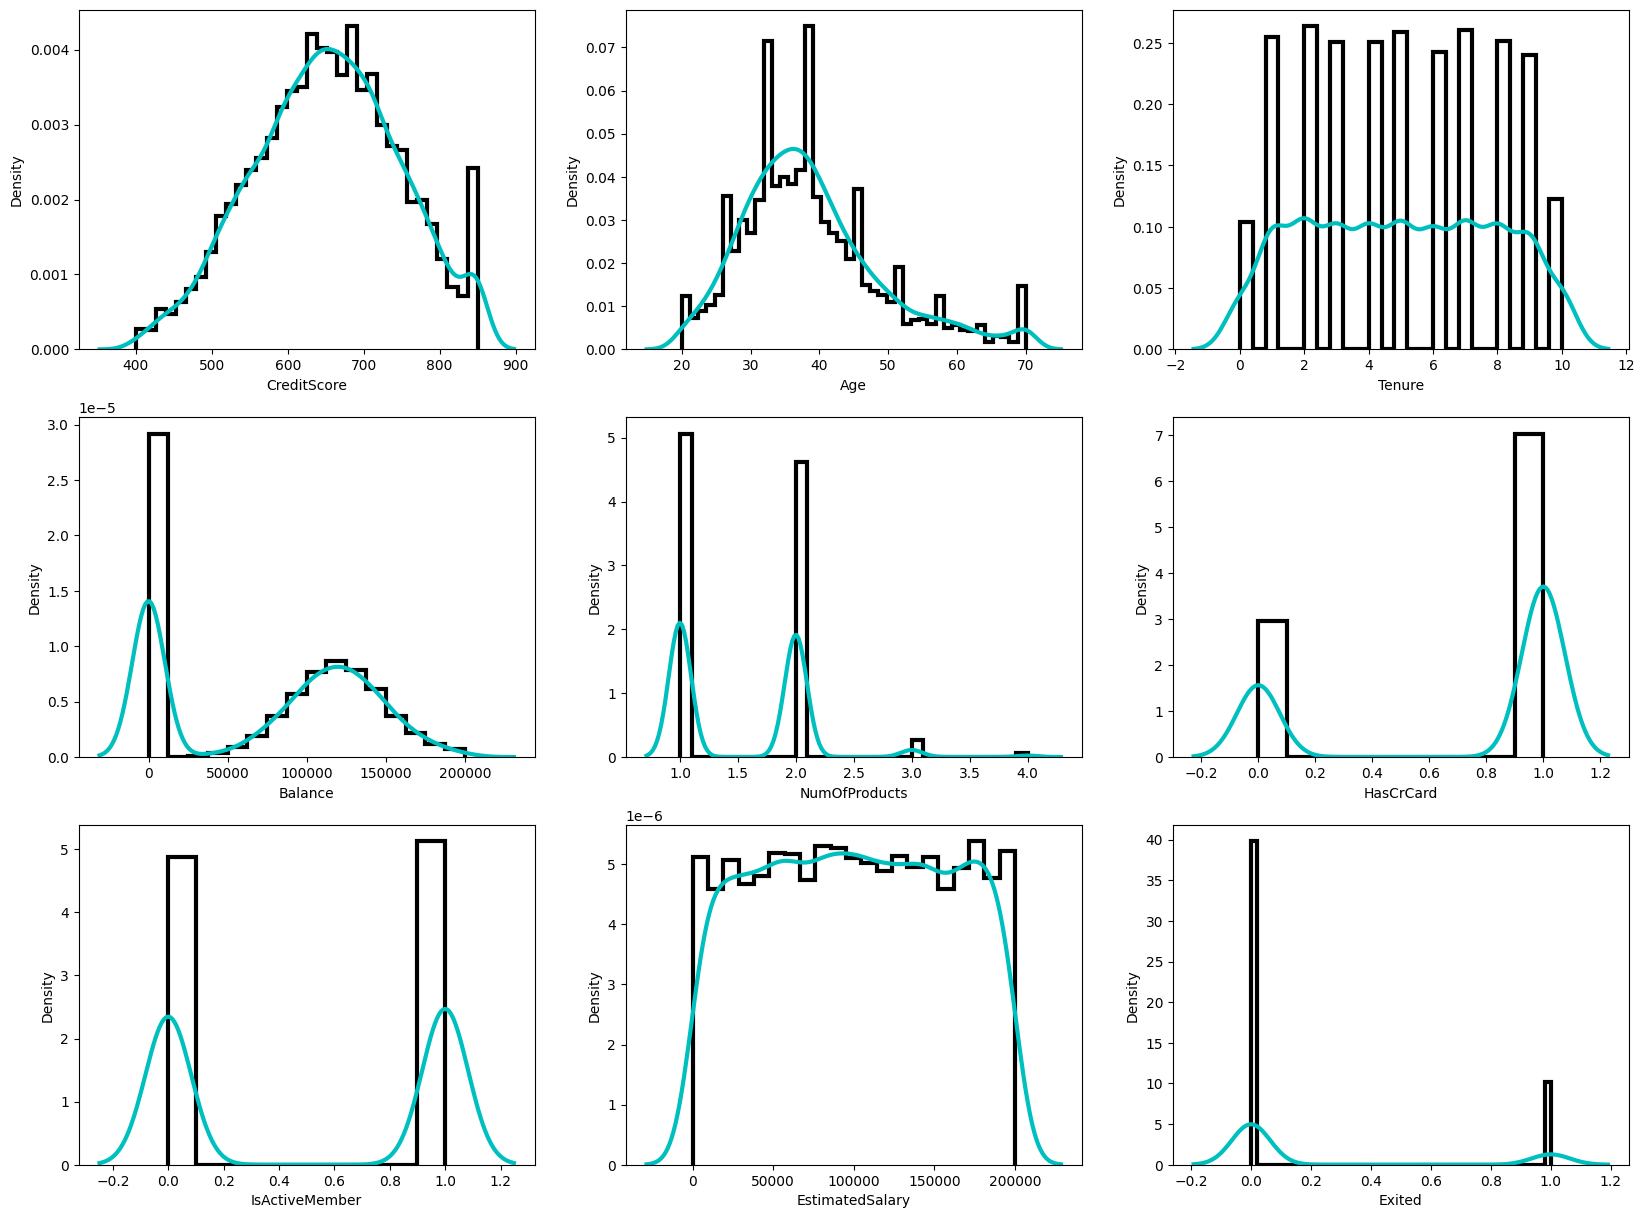

In [512]:
#Graficamos variable CreditScore

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Funcion de densidad + histograma
sns.distplot(X_train_df['CreditScore'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[0, 0])



# Funcion de densidad + histograma
sns.distplot(X_train_df['Age'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[0, 1])



# Funcion de densidad + histograma
sns.distplot(X_train_df['Tenure'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[0, 2])



# Funcion de densidad + histograma
sns.distplot(X_train_df['Balance'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[1, 0])



# Funcion de densidad + histograma
sns.distplot(X_train_df['NumOfProducts'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[1, 1])



# Funcion de densidad + histograma
sns.distplot(X_train_df['HasCrCard'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[1, 2])



# Funcion de densidad + histograma
sns.distplot(X_train_df['IsActiveMember'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[2, 0])



# Funcion de densidad + histograma
sns.distplot(X_train_df['EstimatedSalary'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[2,1])


# Funcion de densidad + histograma
sns.distplot(df['Exited'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[2,2])



<Axes: >

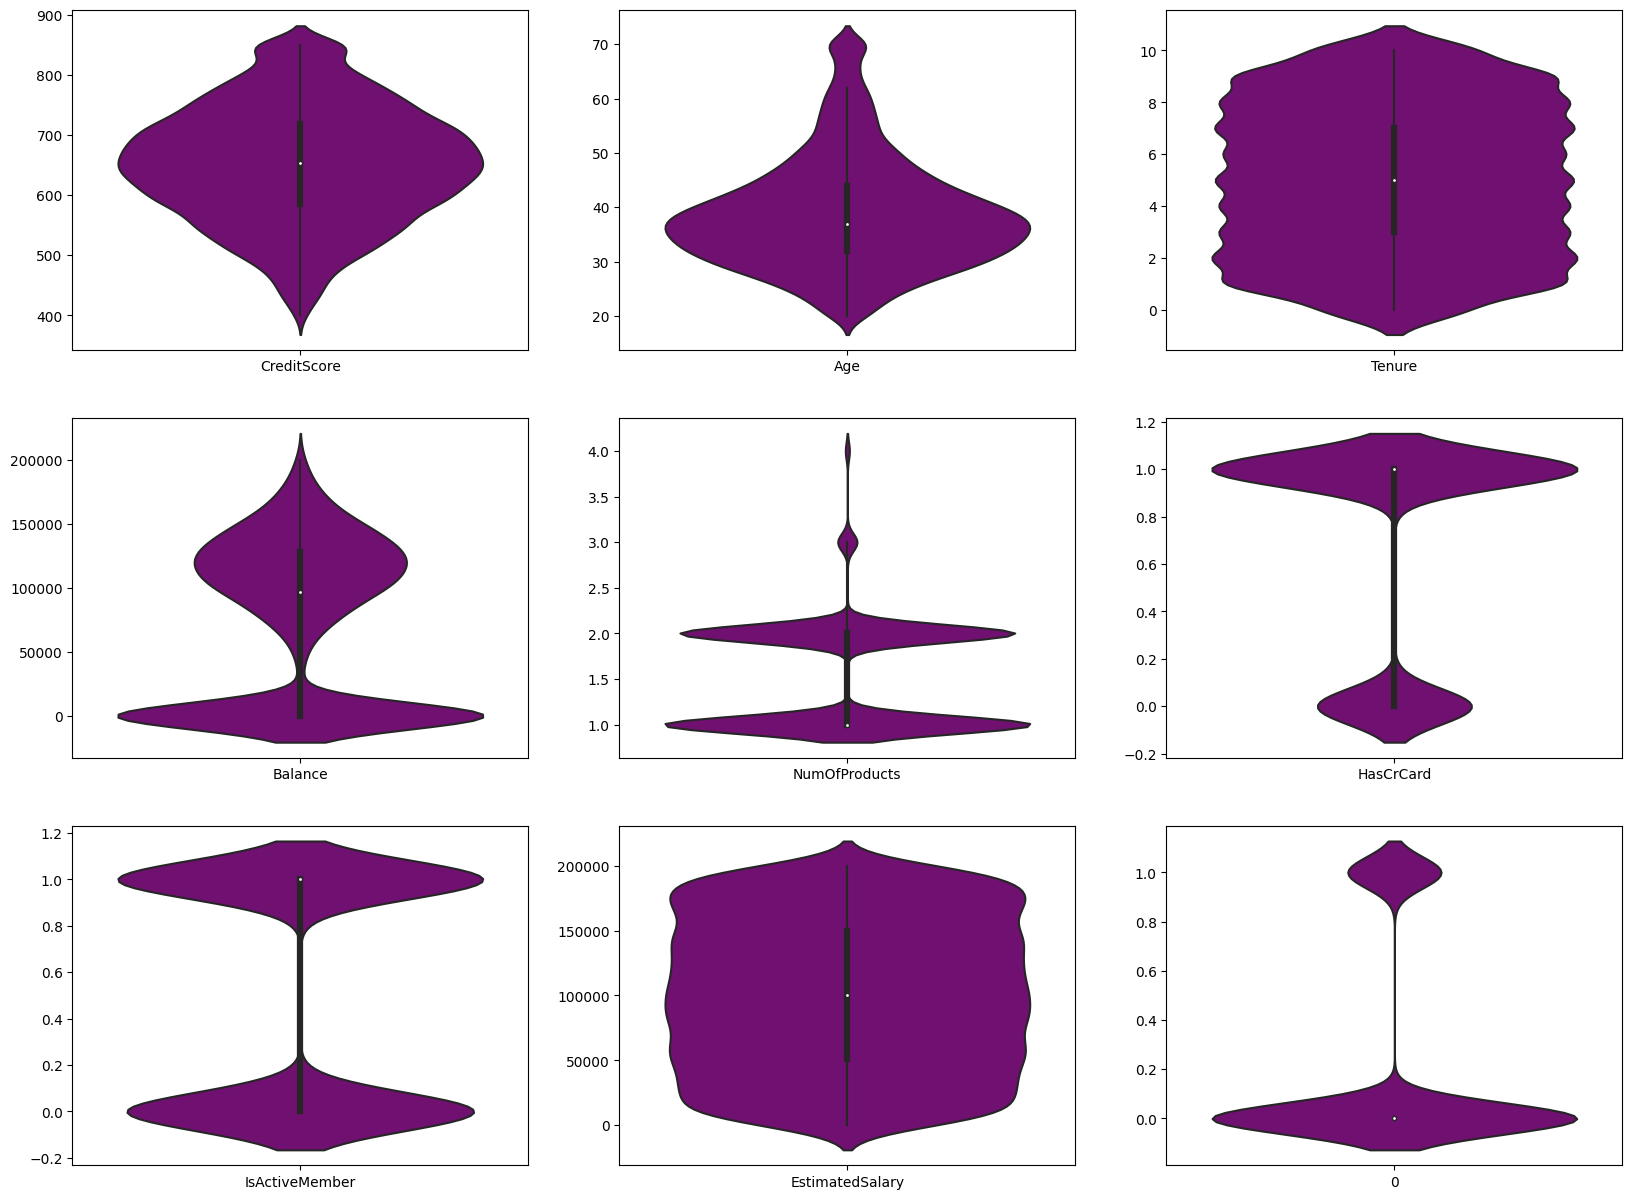

In [516]:
#Graficamos variable CreditScore

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Violin plot
sns.violinplot(X_train_df[['CreditScore']], color="purple", ax=axes[0,0])


# Violin plot
sns.violinplot(X_train_df[['Age']], color="purple", ax=axes[0, 1])


# Violin plot
sns.violinplot(X_train_df[['Tenure']], color="purple", ax=axes[0, 2])


# Violin plot
sns.violinplot(X_train_df[['Balance']], color="purple", ax=axes[1, 0])


# Violin plot
sns.violinplot(X_train_df[['NumOfProducts']], color="purple", ax=axes[1, 1])


# Violin plot
sns.violinplot(X_train_df[['HasCrCard']], color="purple", ax=axes[1, 2])


# Violin plot
sns.violinplot(X_train_df[['IsActiveMember']], color="purple", ax=axes[2, 0])


# Violin plot
sns.violinplot(X_train_df[['EstimatedSalary']], color="purple", ax=axes[2, 1])


# Violin plot
sns.violinplot(df['Exited'], color="purple", ax=axes[2, 2])


### Variable CreditScore         

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\17447137.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\17447137.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Violin plot')

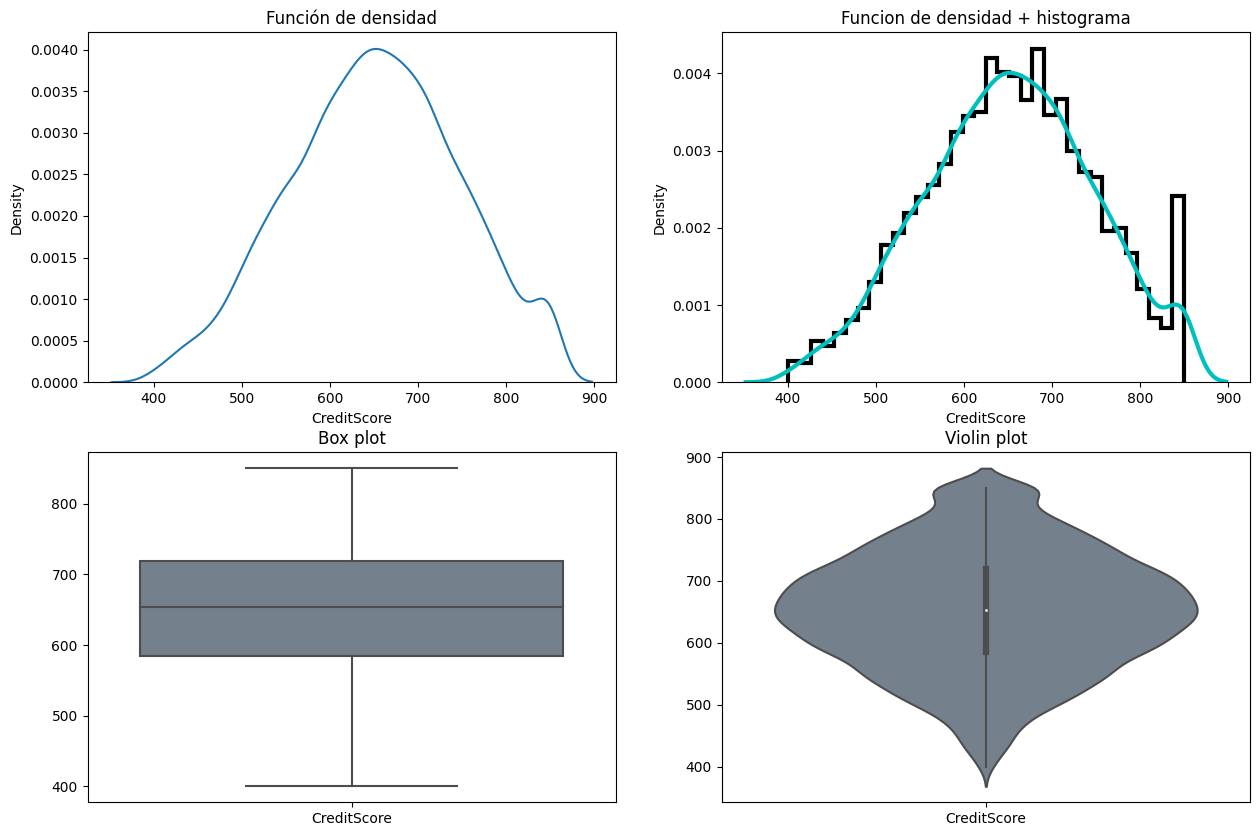

In [470]:
#Graficamos variable CreditScore

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Funcion de densidad
sns.distplot(X_train_df['CreditScore'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")


# Funcion de densidad + histograma
sns.distplot(X_train_df['CreditScore'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[0, 1])

axes[0, 1].set_title("Funcion de densidad + histograma")

# Boxplot
sns.boxplot(X_train_df[['CreditScore']], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(X_train_df[['CreditScore']], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")


Histogramas nos permiten ver las frecuencias de los datos asociados en un intervalo
Densidad vemos la acumulación de datos entorno a un valor
Diagrama de caja: Un diagrama de caja (también, diagrama de caja y bigotes o box plot) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana y los cuartiles de los datos,​ y también pueden representarse sus valores atípicos
Violinplot: https://datavizcatalogue.com/ES/metodos/diagrama_de_violin.html


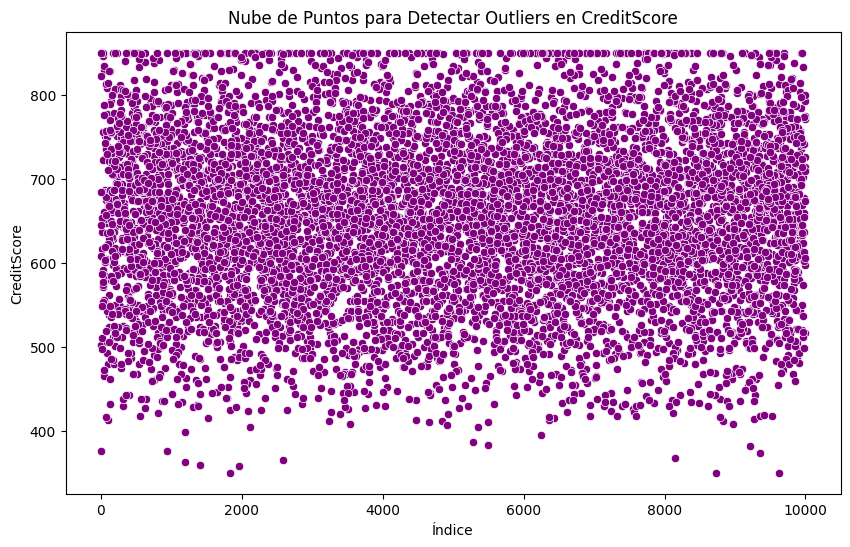

In [366]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_df.index, y=X_train_df['CreditScore'], color='purple')
plt.xlabel('Índice')
plt.ylabel('CreditScore')
plt.title('Nube de Puntos para Detectar Outliers en CreditScore')
plt.show()

En la variable CreditScore se pude observar que existen outlayers por debajo de 400, por este motivo los vamos a sustituir con la mediana, ya que es más robusta frente a estos valores atípicos.

In [368]:
X_train_df.loc[X_train_df['CreditScore'] < 400, 'CreditScore'] = 400


In [369]:
X_train_df.loc[X_train_df['CreditScore'] < 400, 'CreditScore']

Series([], Name: CreditScore, dtype: int64)

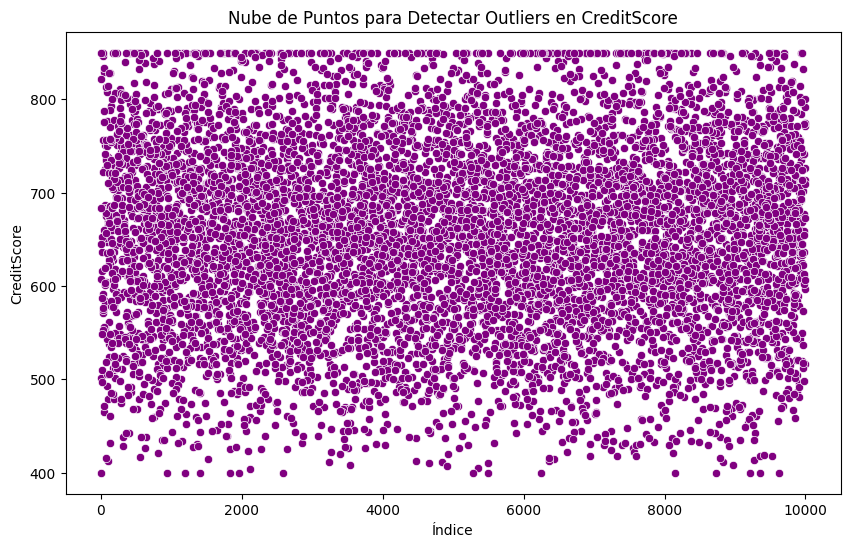

In [370]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_df.index, y=X_train_df['CreditScore'], color='purple')
plt.xlabel('Índice')
plt.ylabel('CreditScore')
plt.title('Nube de Puntos para Detectar Outliers en CreditScore')
plt.show()

### Variable Age

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\1696338192.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\1696338192.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Violin plot')

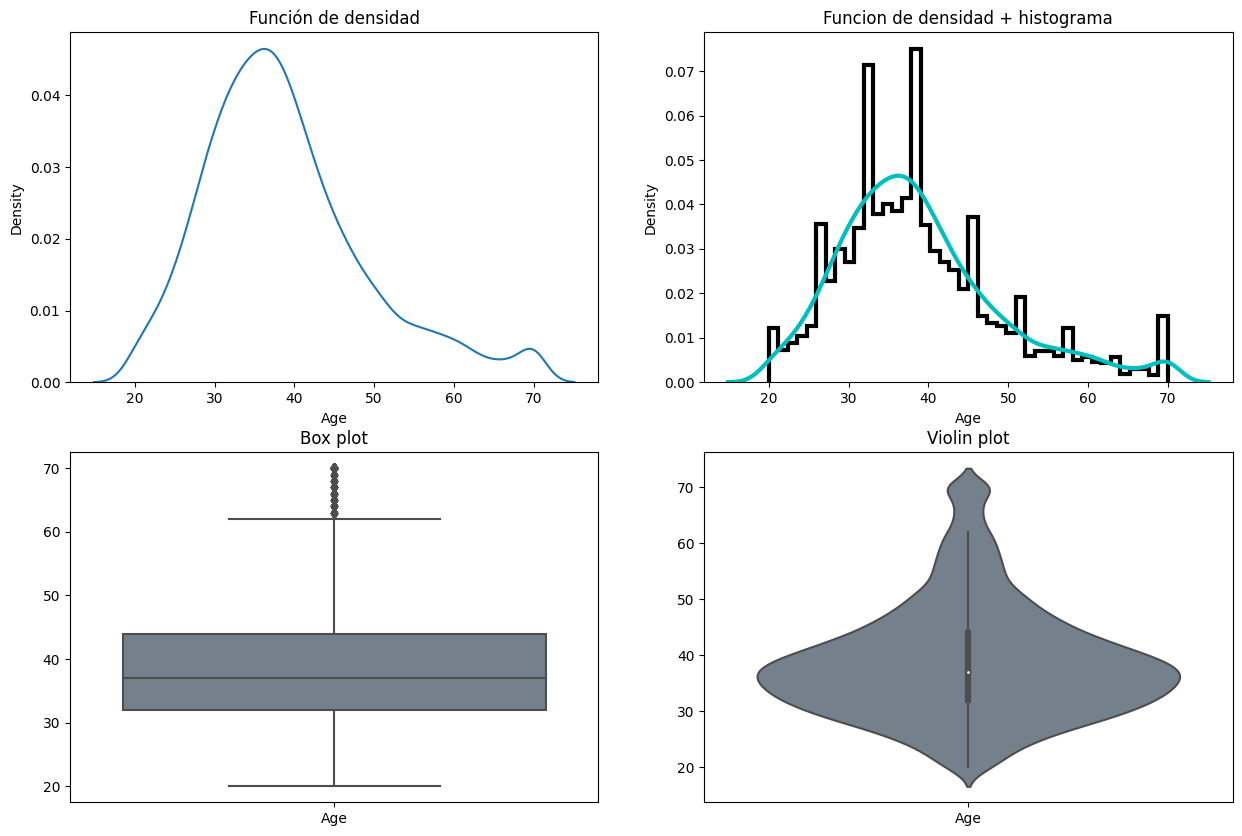

In [471]:
#Graficamos variable Age

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Funcion de densidad
sns.distplot(X_train_df['Age'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")


# Funcion de densidad + histograma
sns.distplot(X_train_df['Age'],
            kde_kws={"color": "c", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "k"},
             ax=axes[0, 1])

axes[0, 1].set_title("Funcion de densidad + histograma")

# Boxplot
sns.boxplot(X_train_df[['Age']], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(X_train_df[['Age']], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")

Del gráfico de densidad se puede observar que la distribución es asimétrica acumulándose los outlayers en la derecha. Lo que nos lleva a analizar que hay más personas adultas que jóvenes y que además, los valores atípicos se encuentran entre los valores mayores a 60 años, pero en este caso al ser el 5% de los datos, no vamos a quitarlos a partir de 60 porque existe la probabilidad de que la empresa tenga un cliente mayor a 60 años. Vamos a considerar valores atípicos a partir de 70 años que son 133 personas.

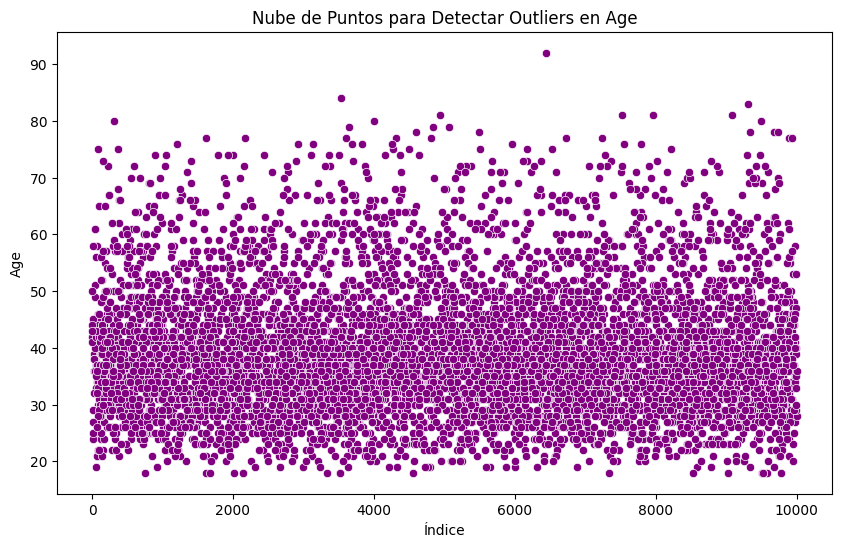

In [381]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_df.index, y=X_train_df['Age'], color='purple')
plt.xlabel('Índice')
plt.ylabel('Age')
plt.title('Nube de Puntos para Detectar Outliers en Age')
plt.show()

In [382]:
X_train_df['Age'].count()

8000

In [383]:
conteo_mayores_60 = (X_train_df['Age'] > 70).sum()
conteo_mayores_60

111

In [385]:
X_train_df.loc[X_train_df['Age'] > 70, 'Age'] = 70

In [386]:
X_train_df.loc[X_train_df['Age'] > 70, 'Age']

Series([], Name: Age, dtype: int64)

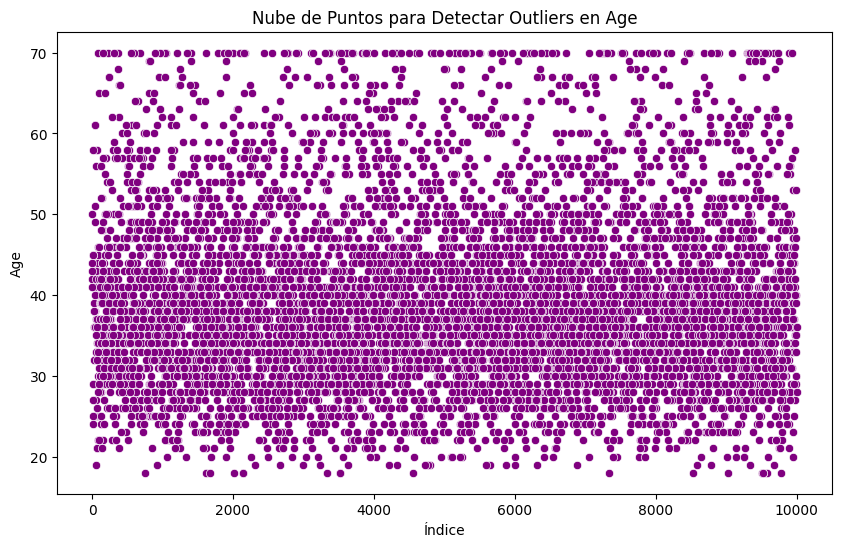

In [387]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_df.index, y=X_train_df['Age'], color='purple')
plt.xlabel('Índice')
plt.ylabel('Age')
plt.title('Nube de Puntos para Detectar Outliers en Age')
plt.show()

In [388]:
X_train_df.loc[X_train_df['Age'] < 20, 'Age'] = 20

In [389]:
X_train_df.loc[X_train_df['Age'] < 20, 'Age']

Series([], Name: Age, dtype: int64)

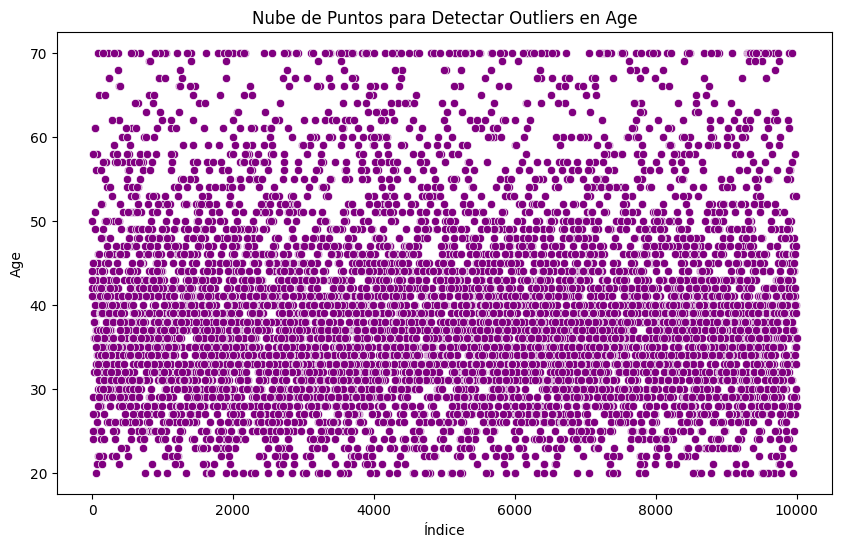

In [390]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_df.index, y=X_train_df['Age'], color='purple')
plt.xlabel('Índice')
plt.ylabel('Age')
plt.title('Nube de Puntos para Detectar Outliers en Age')
plt.show()

### Variable Tenure

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\2398222975.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\2398222975.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Violin plot')

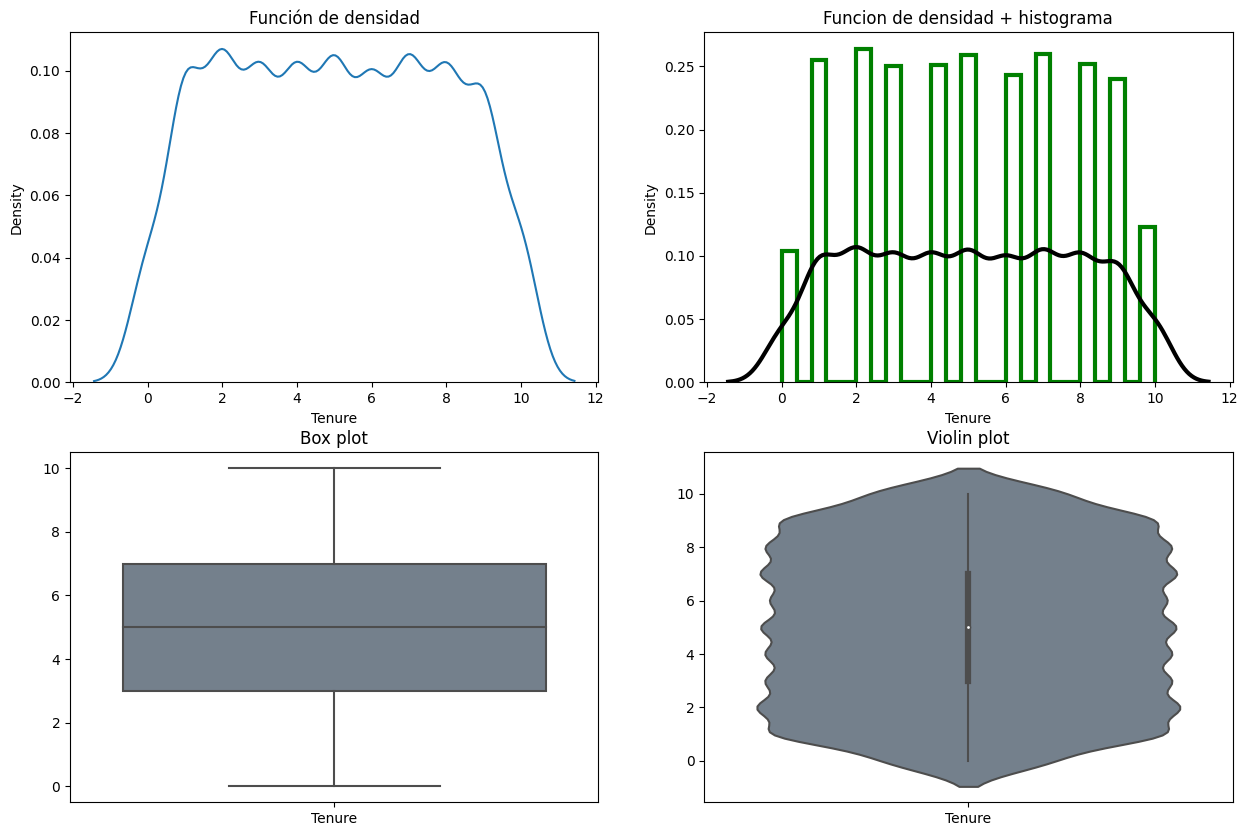

In [430]:
#Graficamos variable Tenure

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Funcion de densidad
sns.distplot(X_train_df['Tenure'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")


# Funcion de densidad + histograma
sns.distplot(X_train_df['Tenure'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 1])

axes[0, 1].set_title("Funcion de densidad + histograma")

# Boxplot
sns.boxplot(X_train_df[['Tenure']], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(X_train_df[['Tenure']], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")

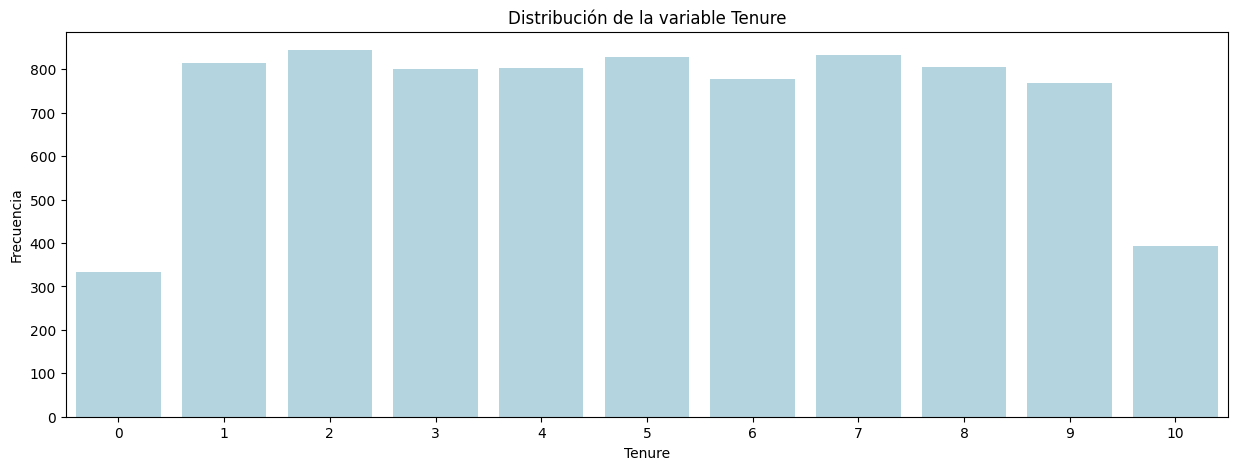

In [392]:
#Graficamos la varialbe Tenure
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Crear un gráfico de barras para la variable categórica "Tenure"
sns.countplot(data=X_train_df, x="Tenure", ax=axes, color= '#ADD8E6')

# Agregar etiquetas y título
axes.set_xlabel("Tenure")
axes.set_ylabel("Frecuencia")
axes.set_title("Distribución de la variable Tenure")

# Mostramos la gráfica
plt.show()

### Variable Balance

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\1502633552.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\1502633552.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Violin plot')

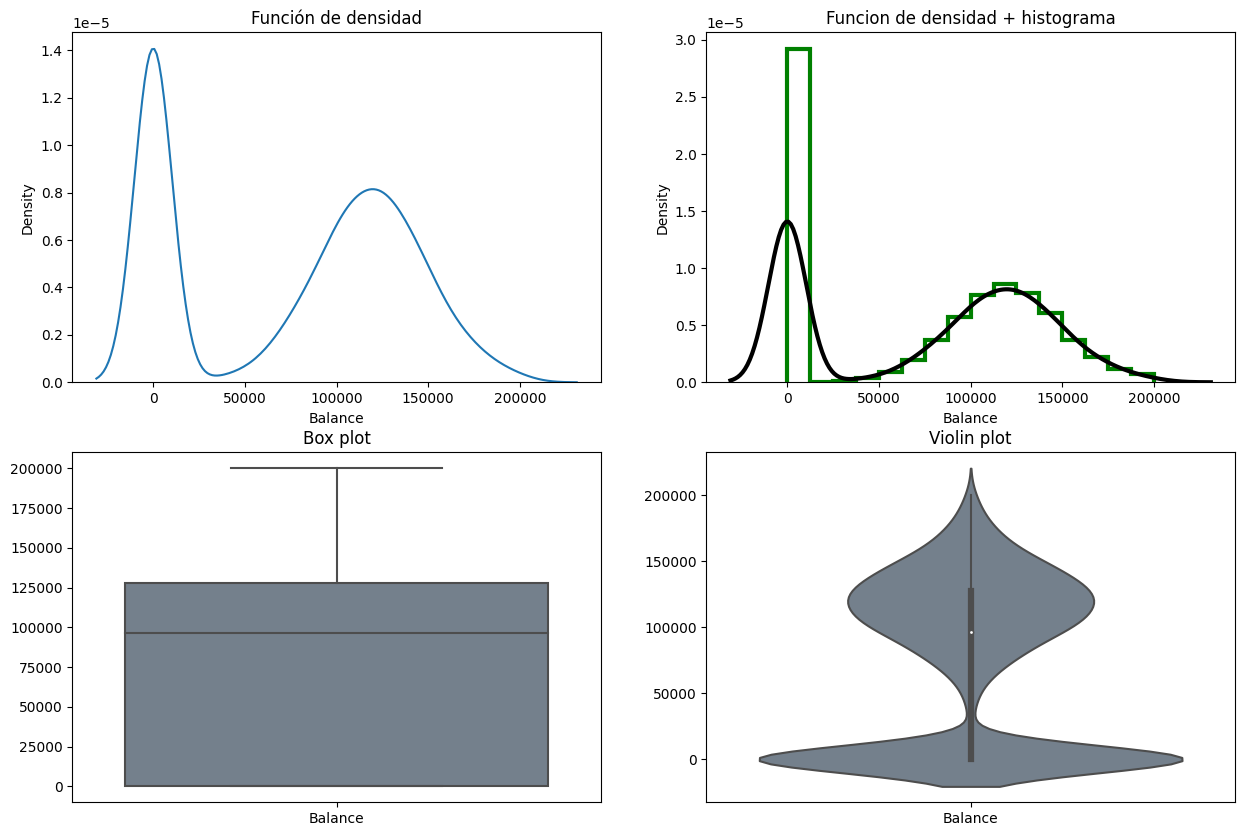

In [429]:
#Graficamos variable Balance

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Funcion de densidad
sns.distplot(X_train_df['Balance'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")


# Funcion de densidad + histograma
sns.distplot(X_train_df['Balance'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 1])

axes[0, 1].set_title("Funcion de densidad + histograma")

# Boxplot
sns.boxplot(X_train_df[['Balance']], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(X_train_df[['Balance']], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")

In [394]:
valores_0 = (X_train_df['Balance'] == 1).sum()
valores_0

0

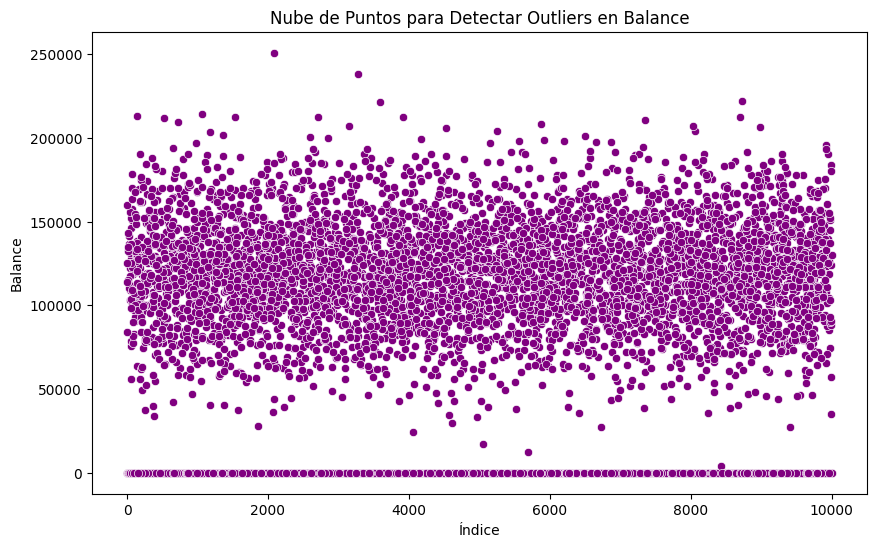

In [395]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_df.index, y=X_train_df['Balance'], color='purple')
plt.xlabel('Índice')
plt.ylabel('Balance')
plt.title('Nube de Puntos para Detectar Outliers en Balance')
plt.show()

In [396]:
X_train_df.loc[X_train_df['Balance'] > 200000, 'Balance'] = 200000


In [397]:
X_train_df.loc[X_train_df['Balance'] > 200000, 'Balance']

Series([], Name: Balance, dtype: float64)

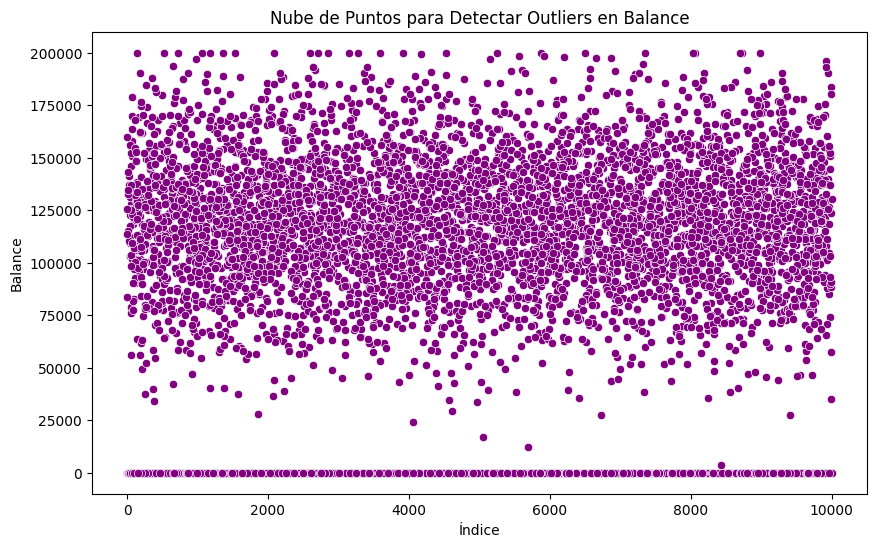

In [398]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_df.index, y=X_train_df['Balance'], color='purple')
plt.xlabel('Índice')
plt.ylabel('Balance')
plt.title('Nube de Puntos para Detectar Outliers en Balance')
plt.show()

### Variable NumOfProducts

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\2021718237.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\2021718237.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Violin plot')

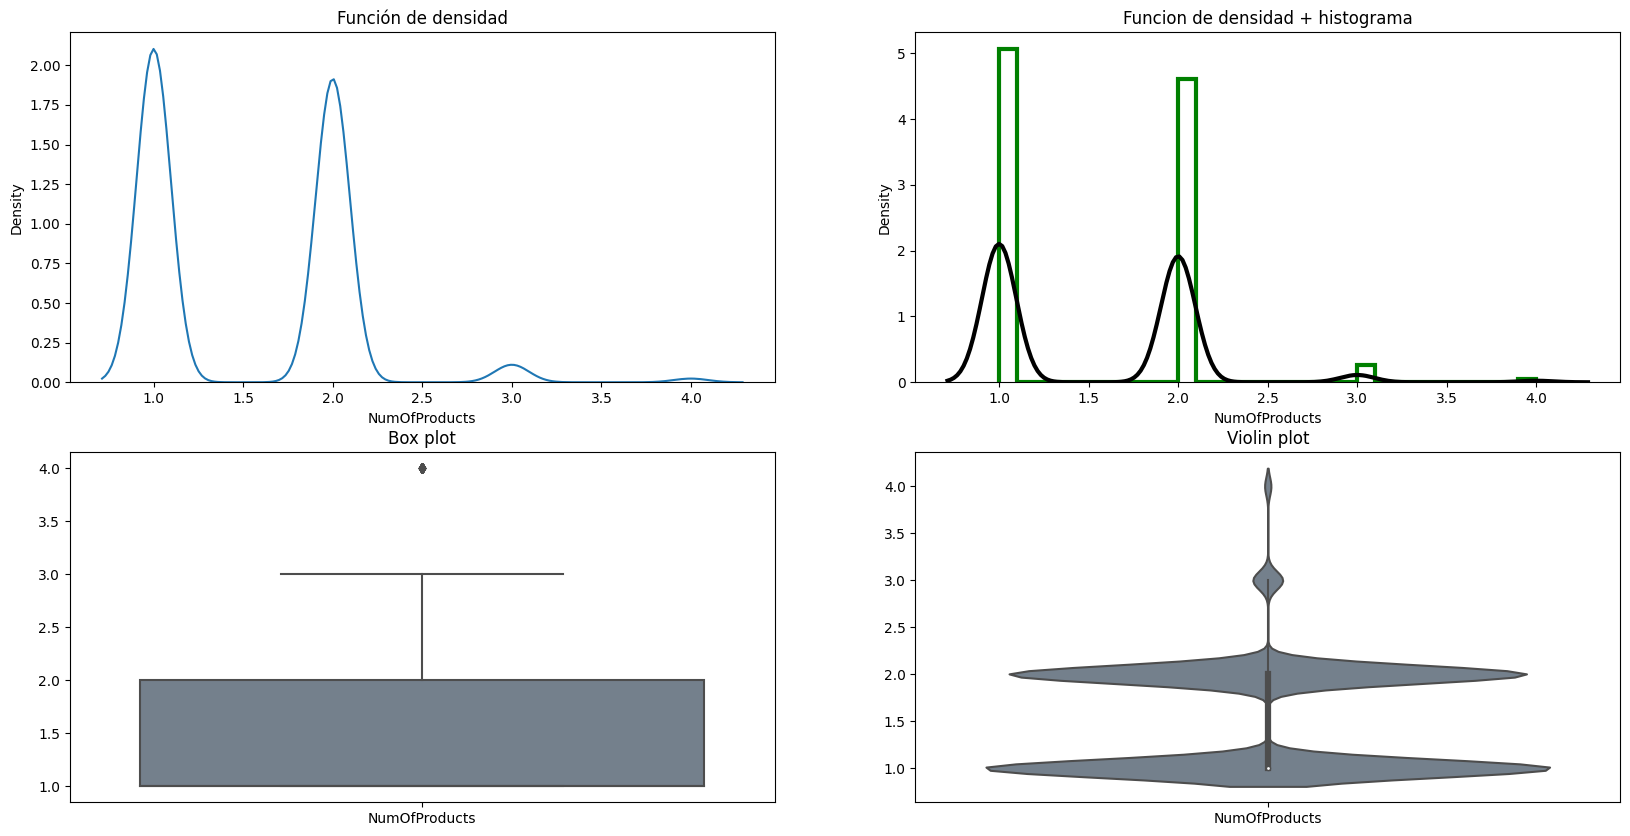

In [399]:
#Graficamos variable NumOfProducts

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Funcion de densidad
sns.distplot(X_train_df['NumOfProducts'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")


# Funcion de densidad + histograma
sns.distplot(X_train_df['NumOfProducts'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 1])

axes[0, 1].set_title("Funcion de densidad + histograma")

# Boxplot
sns.boxplot(X_train_df[['NumOfProducts']], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(X_train_df[['NumOfProducts']], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")

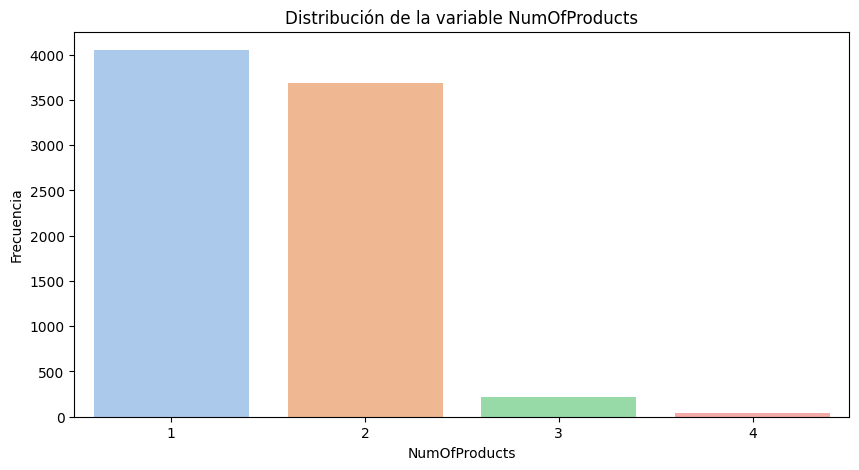

In [475]:
# Graficamos la variable NumOfProducts
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Definir la paleta "pastel"
palette = sns.color_palette("pastel")

# Crear un gráfico de barras para la variable categórica "NumOfProducts" 
sns.countplot(data=X_train_df, x="NumOfProducts", ax=axes, palette=palette)

# Agregar etiquetas y título
axes.set_xlabel("NumOfProducts")
axes.set_ylabel("Frecuencia")
axes.set_title("Distribución de la variable NumOfProducts")

# Mostramos la gráfica
plt.show()


### Variable HasCrCard

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\1009257960.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\1009257960.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Violin plot')

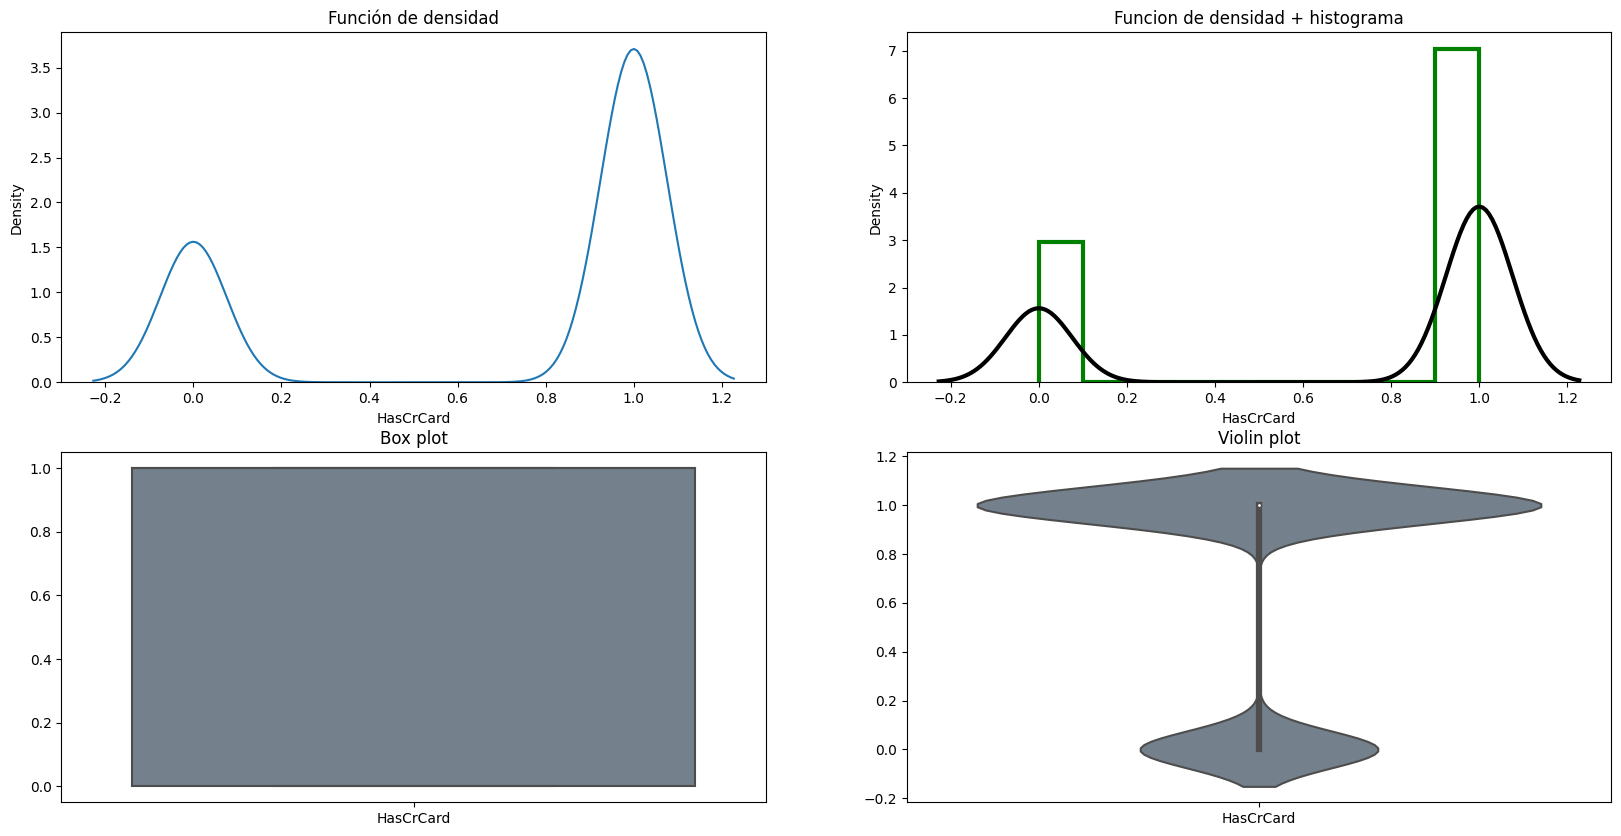

In [401]:
#Graficamos variable HasCrCard

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Funcion de densidad
sns.distplot(X_train_df['HasCrCard'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")


# Funcion de densidad + histograma
sns.distplot(X_train_df['HasCrCard'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 1])

axes[0, 1].set_title("Funcion de densidad + histograma")

# Boxplot
sns.boxplot(X_train_df[['HasCrCard']], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(X_train_df[['HasCrCard']], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")

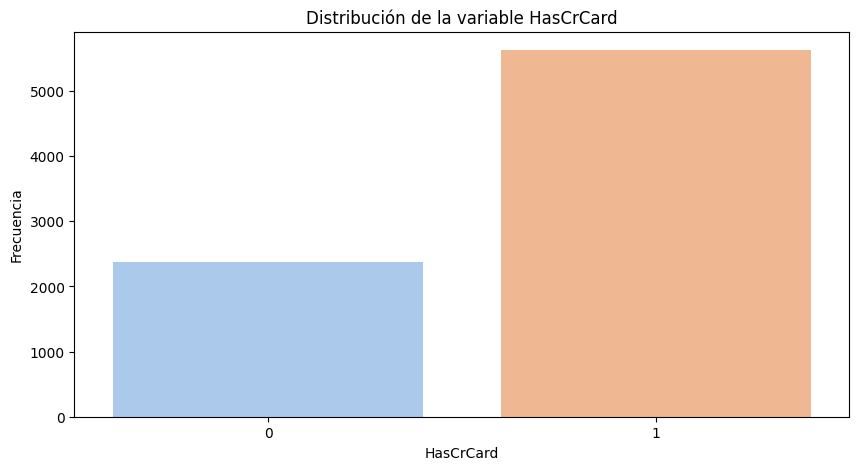

In [478]:
#Graficamos la varialbe HasCrCard
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Definir la paleta "pastel"
palette = sns.color_palette("pastel")

# Crear un gráfico de barras para la variable categórica "HasCrCard"
sns.countplot(data=X_train_df, x="HasCrCard", ax=axes, palette=palette)

# Agregar etiquetas y título
axes.set_xlabel("HasCrCard")
axes.set_ylabel("Frecuencia")
axes.set_title("Distribución de la variable HasCrCard")

# Mostramos la gráfica
plt.show()


### Variable IsActiveMember

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\3383989704.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\3383989704.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Violin plot')

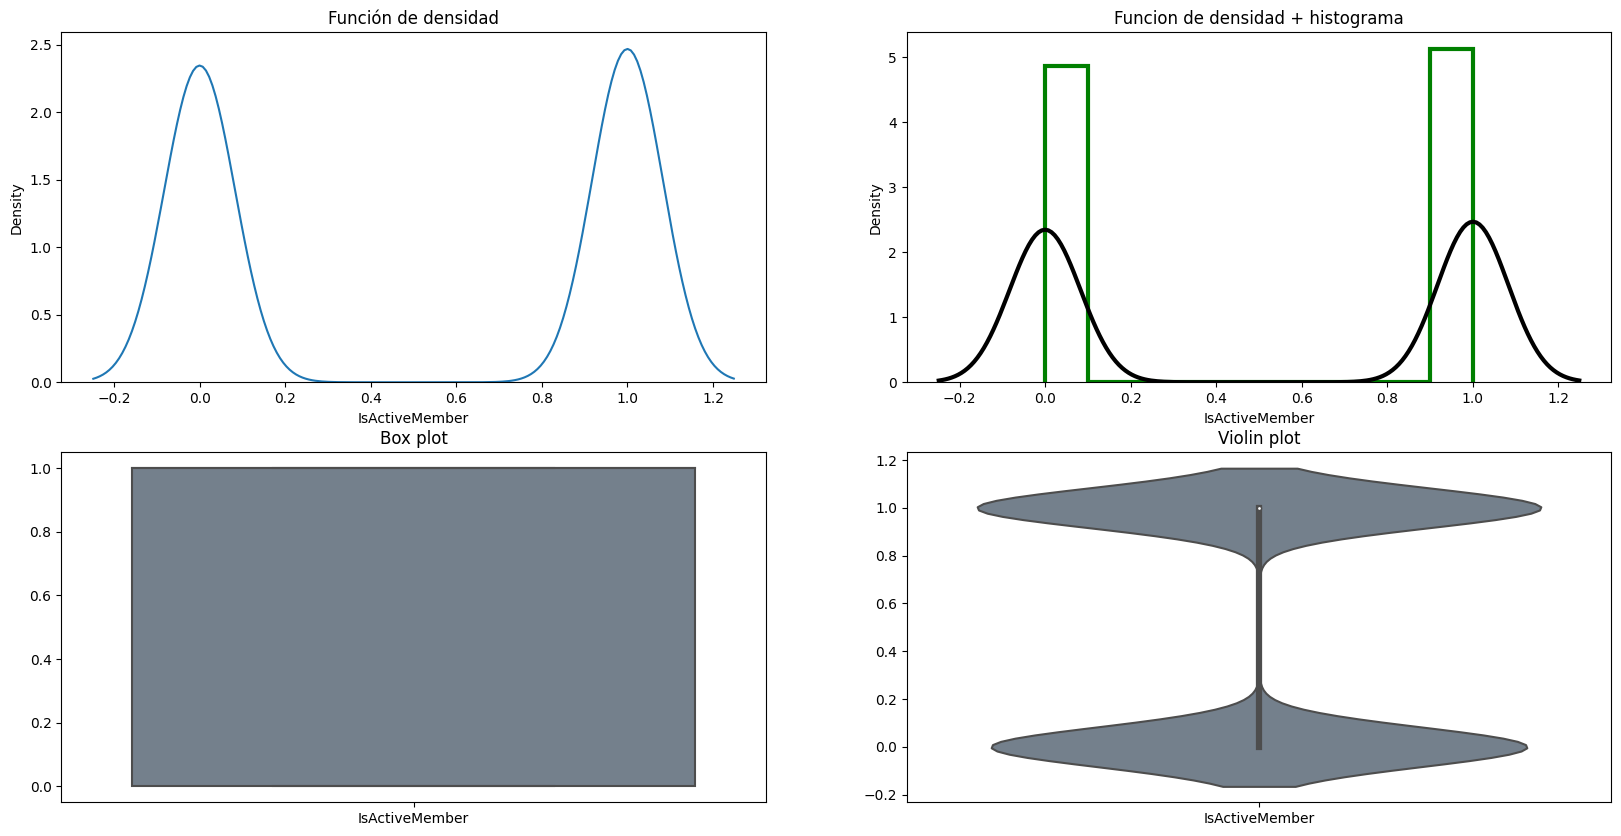

In [403]:
#Graficamos variable IsActiveMember

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Funcion de densidad
sns.distplot(X_train_df['IsActiveMember'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")


# Funcion de densidad + histograma
sns.distplot(X_train_df['IsActiveMember'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 1])

axes[0, 1].set_title("Funcion de densidad + histograma")

# Boxplot
sns.boxplot(X_train_df[['IsActiveMember']], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(X_train_df[['IsActiveMember']], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")

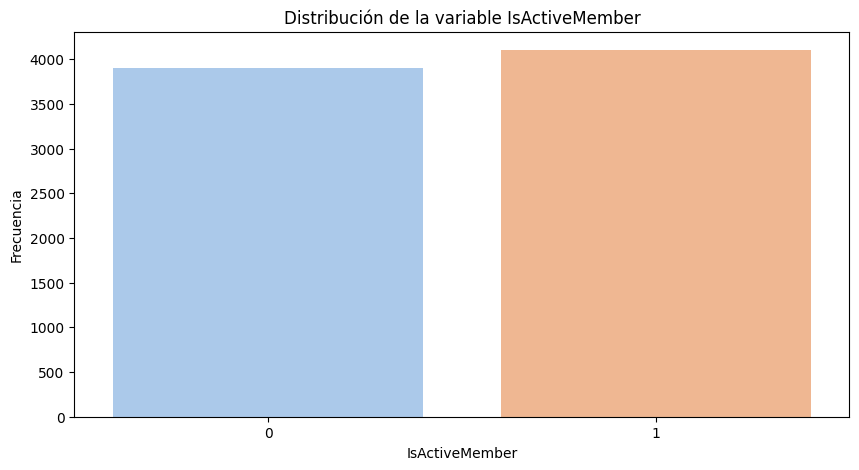

In [479]:
#Graficamos la varialbe IsActiveMember
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Definir la paleta "pastel"
palette = sns.color_palette("pastel")

# Crear un gráfico de barras para la variable categórica "HasCrCard"
sns.countplot(data=X_train_df, x="IsActiveMember", ax=axes,palette=palette )

# Agregar etiquetas y título
axes.set_ylabel("Frecuencia")
axes.set_title("Distribución de la variable IsActiveMember")

# Mostramos la gráfica
plt.show()

### Variable EstimatedSalary

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\3618796150.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\3618796150.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Violin plot')

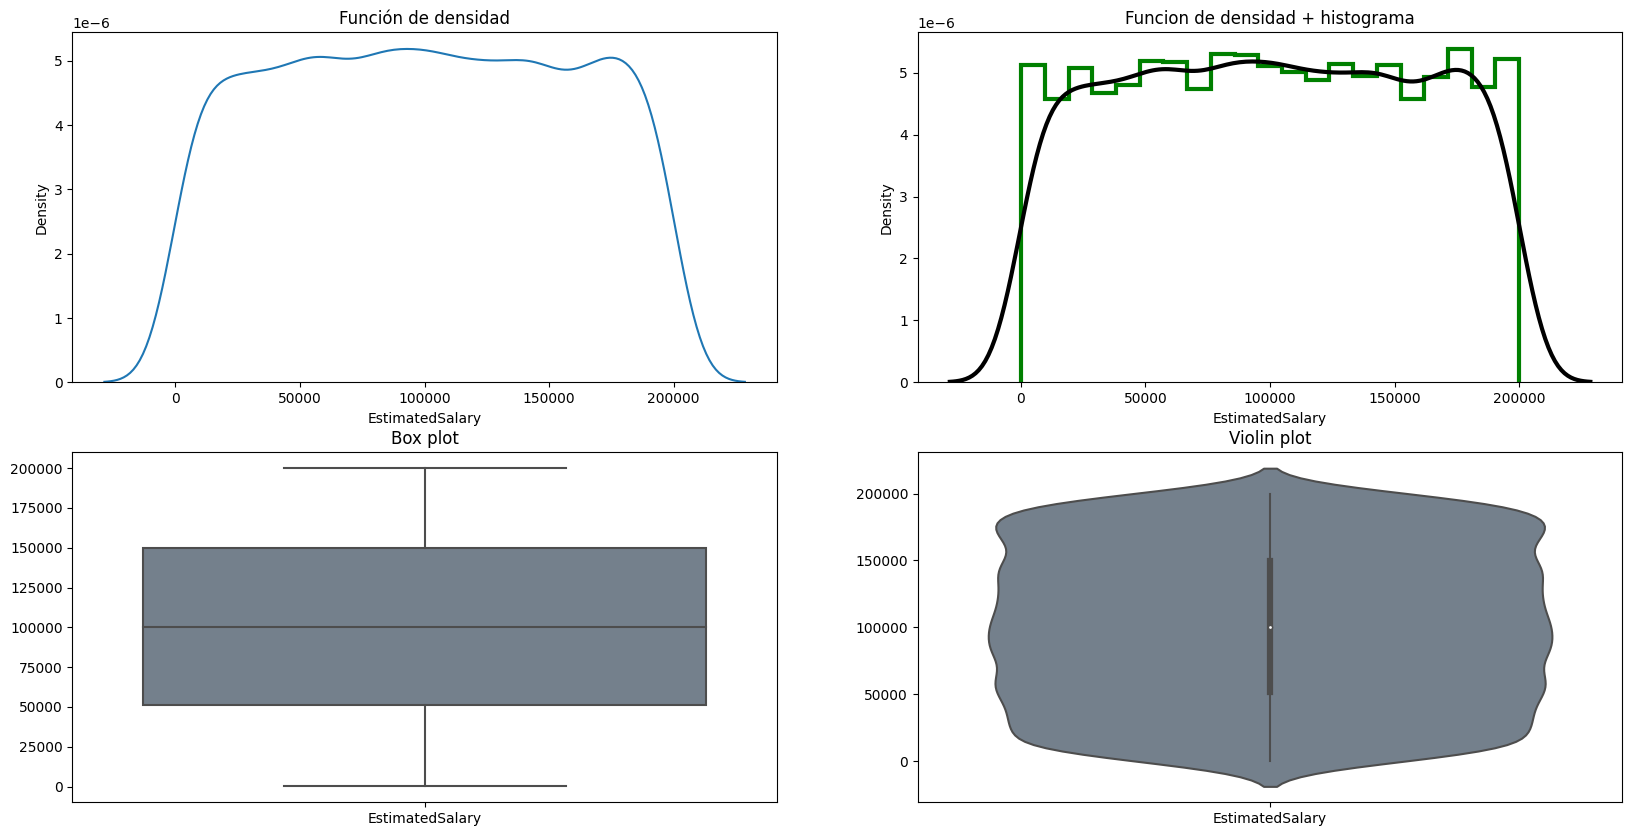

In [480]:
#Graficamos variable EstimatedSalary

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Funcion de densidad
sns.distplot(X_train_df['EstimatedSalary'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")


# Funcion de densidad + histograma
sns.distplot(X_train_df['EstimatedSalary'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 1])

axes[0, 1].set_title("Funcion de densidad + histograma")

# Boxplot
sns.boxplot(X_train_df[['EstimatedSalary']], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(X_train_df[['EstimatedSalary']], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")

### Variable Geography

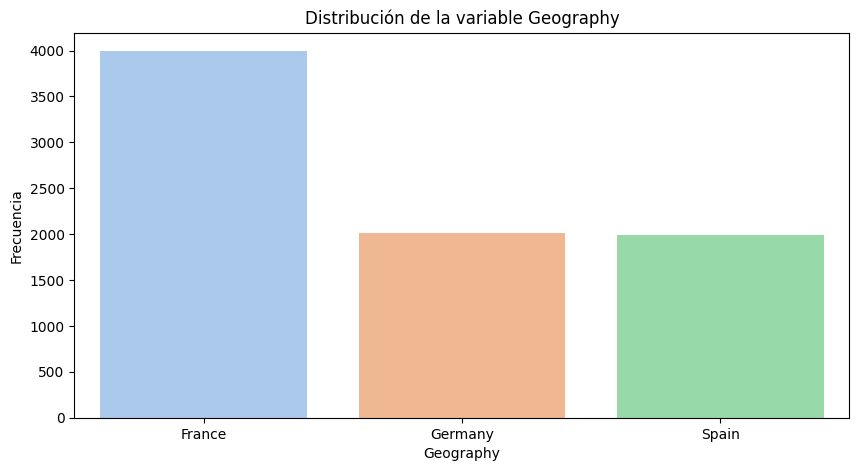

In [481]:
#Graficamos la varialbe Geography

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Definir la paleta "pastel"
palette = sns.color_palette("pastel")

# Crear un gráfico de barras para la variable categórica "HasCrCard"
sns.countplot(data=X_train_df, x="Geography", ax=axes, palette= palette)

# Agregar etiquetas y título
axes.set_ylabel("Frecuencia")
axes.set_title("Distribución de la variable Geography")

# Mostramos la gráfica
plt.show()

### Variable Gender

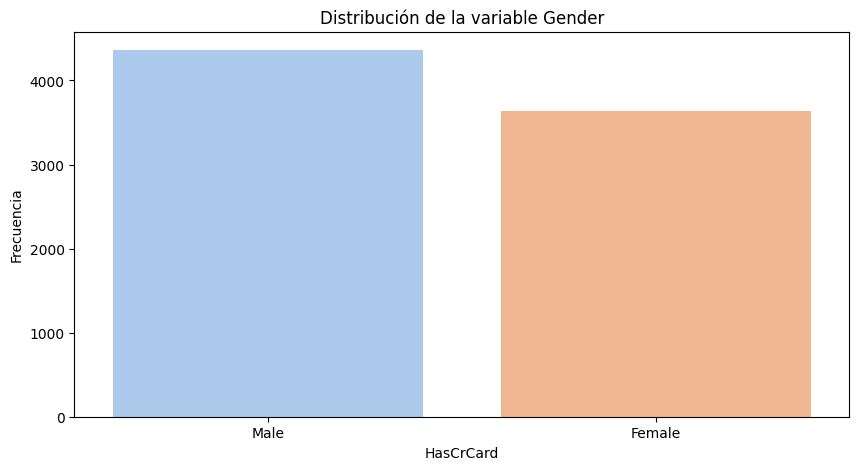

In [482]:
#Graficamos la varialbe Gender

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Definir la paleta "pastel"
palette = sns.color_palette("pastel")

# Crear un gráfico de barras para la variable categórica "HasCrCard"
sns.countplot(data=X_train_df, x="Gender", ax=axes, palette = palette)

# Agregar etiquetas y título
axes.set_xlabel("HasCrCard")
axes.set_ylabel("Frecuencia")
axes.set_title("Distribución de la variable Gender")

# Mostramos la gráfica
plt.show()

### Variable Exited

Para poder pintar la relación que pueden tener las variables con el target creamos un nuevo dataframe solo con valores de train

C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\673902988.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Diana\AppData\Local\Temp\ipykernel_44768\673902988.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Violin plot')

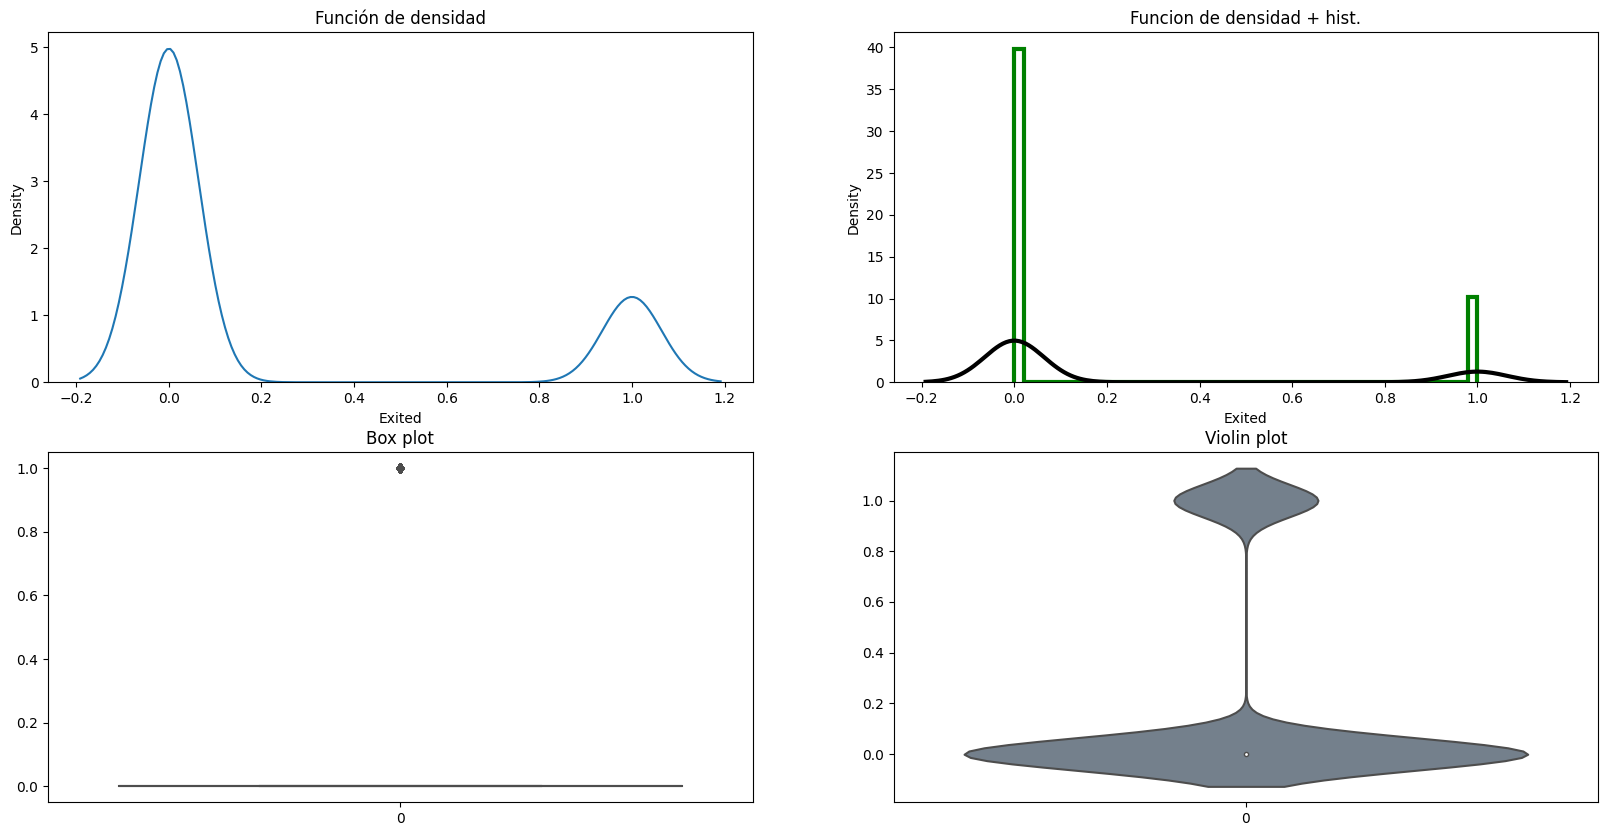

In [483]:
#Graficamos variable Exited

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Funcion de densidad
sns.distplot(df['Exited'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")

# Funcion de densidad + histograma
sns.distplot(df['Exited'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 1])

axes[0, 1].set_title("Funcion de densidad + hist.")

# Boxplot
sns.boxplot(df['Exited'], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(df['Exited'], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")


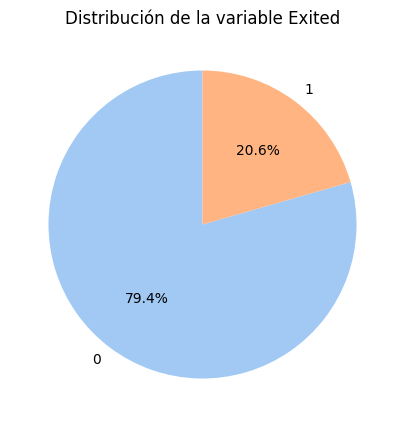

In [486]:
# Obtener la frecuencia de cada categoría en Exited
frecuencias = Exited_grafic['Exited'].value_counts()

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
palette = sns.color_palette("pastel")
axes.pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%', startangle=90, colors= palette)
axes.set_title("Distribución de la variable Exited")

plt.show()

In [412]:
exited_counts = Exited_grafic['Exited'].value_counts()
exited_counts

Exited
0    6356
1    1644
Name: count, dtype: int64

In [415]:
print('Porcentaje de 0 en el conjunto de train', round((6356/8000)*100,2),'%')
print('Porcentaje de 1 en el conjunto de train', round((1644/8000)*100,2),'%')

Porcentaje de 0 en el conjunto de train 79.45 %
Porcentaje de 1 en el conjunto de train 20.55 %


In [416]:
data_train = pd.concat([X_train_df, y_train_df], axis=1)
data_train.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9254          686    France    Male   32       6       0.00              2   
1561          632   Germany    Male   42       4  119624.60              2   
1670          559     Spain    Male   24       3  114739.92              1   
6087          561    France  Female   27       9  135637.00              1   
6669          517    France    Male   56       9  142147.32              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
9254          1               1        179093.26       0  
1561          1               1        195978.86       0  
1670          1               0         85891.02       1  
6087          1               0        153080.40       1  
6669          0               0         39488.04       1

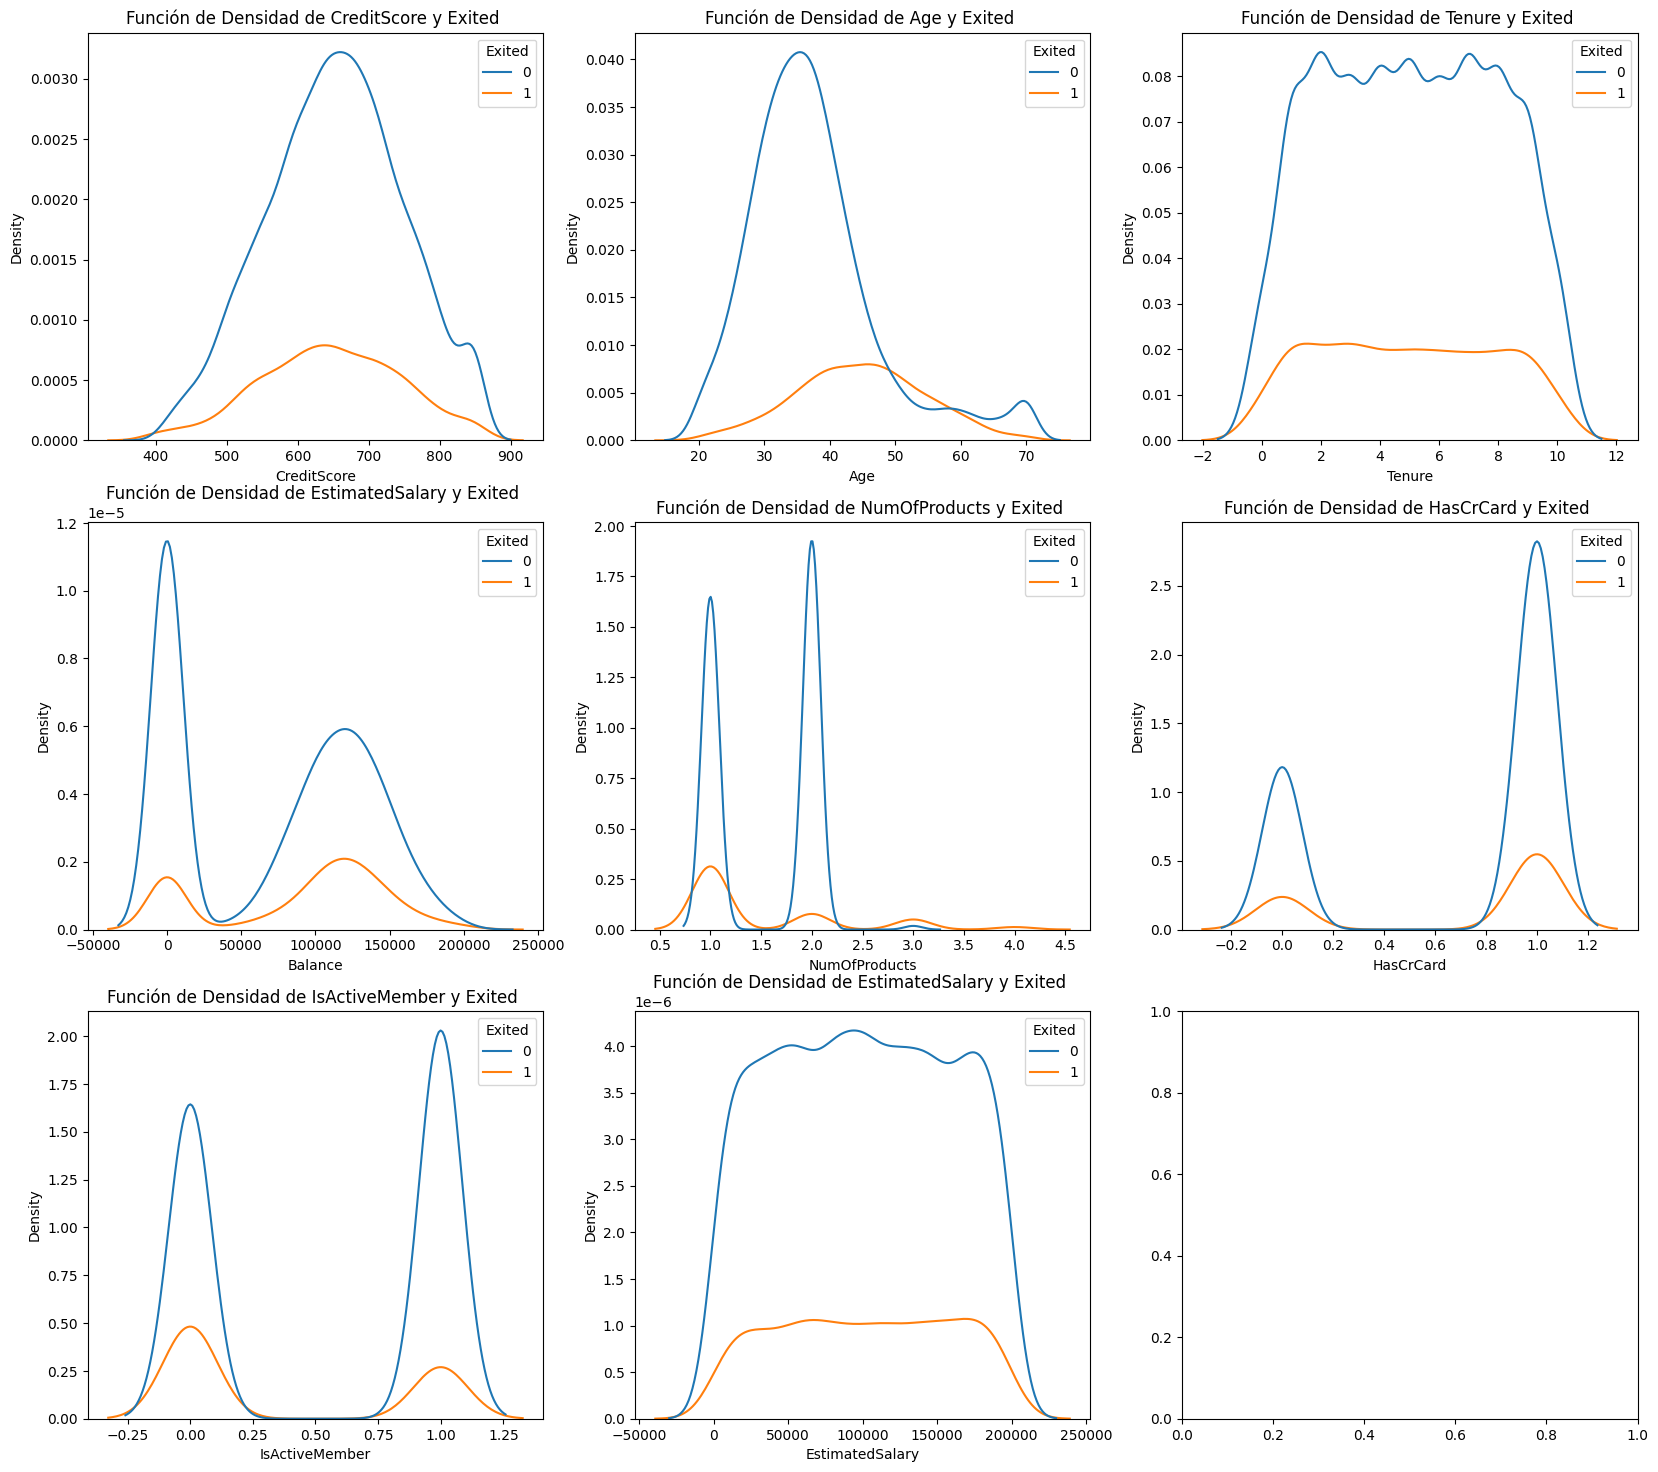

In [522]:
#Graficamos variable Exited

fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# Función de Densidad de CreditScore y Exited
sns.kdeplot(data=data_train, x='CreditScore', hue = 'Exited', ax=axes[0, 0])
axes[0, 0].set_title("Función de Densidad de CreditScore y Exited ");

# Función de Densidad de Age y Exited
sns.kdeplot(data=data_train, x='Age', hue = 'Exited', ax=axes[0, 1])
axes[0, 1].set_title("Función de Densidad de Age y Exited ");

# Función de Densidad de Tenure y Exited
sns.kdeplot(data=data_train, x='Tenure', hue = 'Exited', ax=axes[0,2])
axes[0,2].set_title("Función de Densidad de Tenure y Exited ");

# Función de Densidad de EstimatedSalary y Exited
sns.kdeplot(data=data_train, x='Balance', hue = 'Exited', ax=axes[1, 0])
axes[1, 0].set_title("Función de Densidad de EstimatedSalary y Exited ");

# Función de Densidad de NumOfProducts y Exited
sns.kdeplot(data=data_train, x='NumOfProducts', hue = 'Exited', ax=axes[1,1])
axes[1,1].set_title("Función de Densidad de NumOfProducts y Exited ");

# Función de Densidad de HasCrCard y Exited
sns.kdeplot(data=data_train, x='HasCrCard', hue = 'Exited', ax=axes[1,2])
axes[1,2].set_title("Función de Densidad de HasCrCard y Exited ");

# Función de Densidad de IsActiveMember y Exited
sns.kdeplot(data=data_train, x='IsActiveMember', hue = 'Exited', ax=axes[2,0])
axes[2,0].set_title("Función de Densidad de IsActiveMember y Exited ");

# Función de Densidad de EstimatedSalary y Exited
sns.kdeplot(data=data_train, x='EstimatedSalary', hue = 'Exited', ax=axes[2, 1])
axes[2, 1].set_title("Función de Densidad de EstimatedSalary y Exited ");





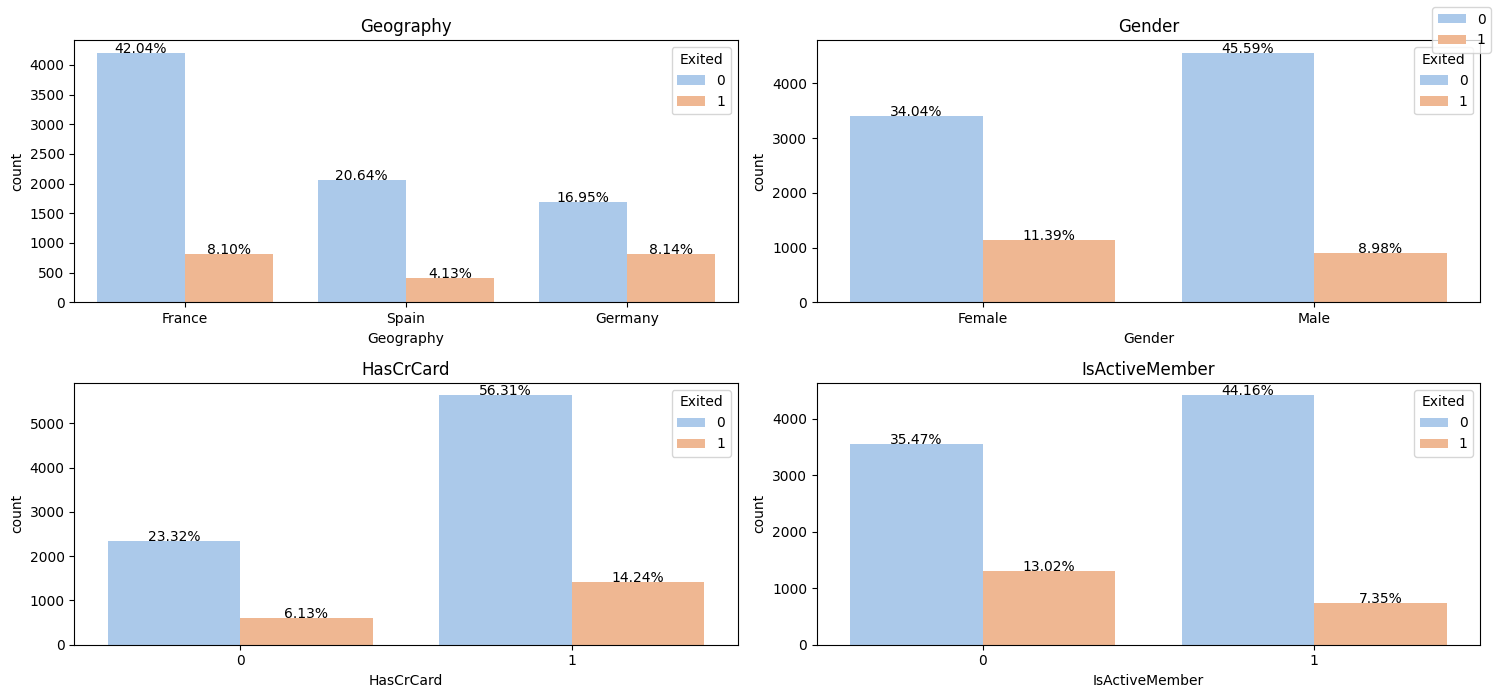

In [487]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 7))

palette = sns.color_palette("pastel")

# Porcentajes en los gráficos
def add_percentage_labels(count_plot, total_count):
    for p in count_plot.patches:
        height = p.get_height()
        count_plot.text(p.get_x() + p.get_width() / 2., height + 0.2,
                        f'{height / total_count:.2%}', ha="center")

# Gráfico 1: Geography
ax1 = sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0], palette= palette)
add_percentage_labels(ax1, len(df))

# Gráfico 2: Gender
ax2 = sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1], palette= palette)
add_percentage_labels(ax2, len(df))

# Gráfico 3: HasCrCard
ax3 = sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0], palette= palette)
add_percentage_labels(ax3, len(df))

# Gráfico 4: IsActiveMember
ax4 = sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1], palette= palette)
add_percentage_labels(ax4, len(df))

# Títulos
axarr[0][0].set_title("Geography")
axarr[0][1].set_title("Gender")
axarr[1][0].set_title("HasCrCard")
axarr[1][1].set_title("IsActiveMember")

# Leyendas
handles, labels = ax4.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Diseño
plt.tight_layout()


plt.show()

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

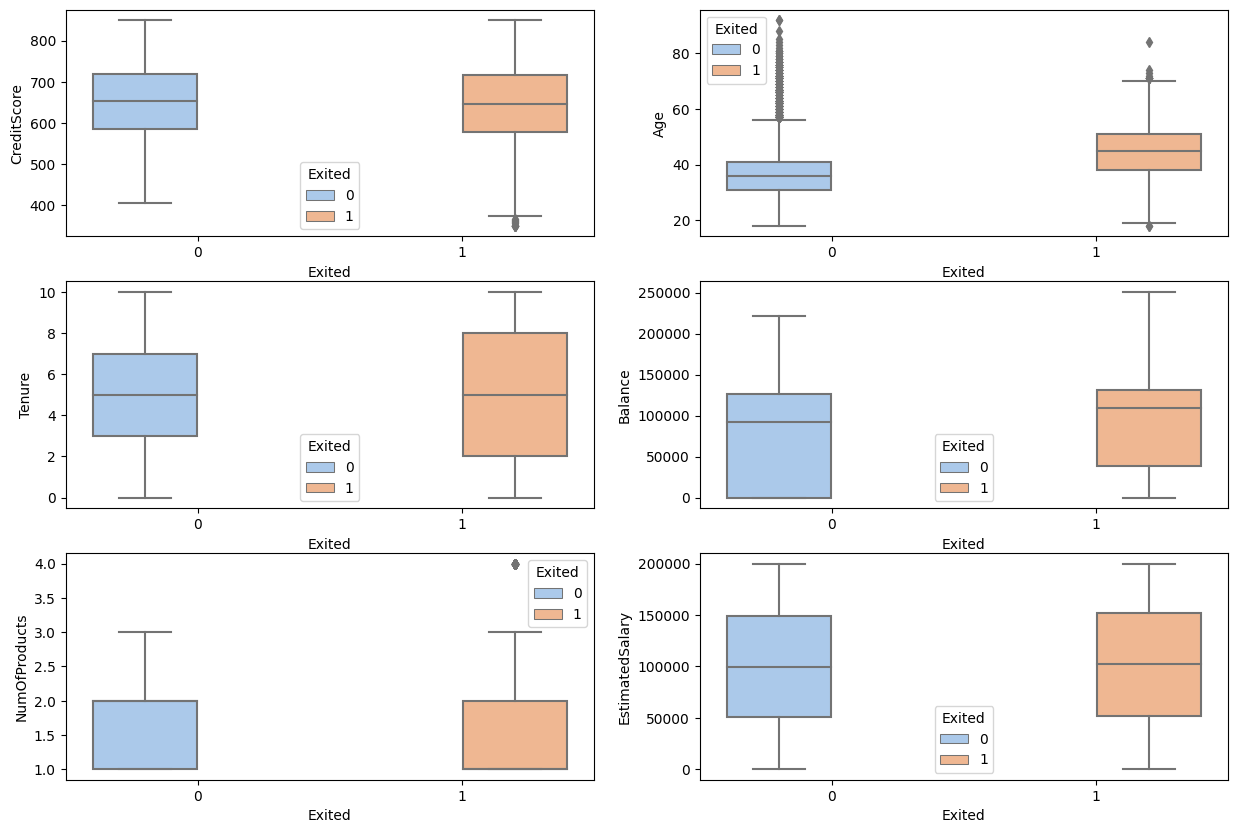

In [488]:
fig, axarr = plt.subplots(3, 2, figsize=(15, 10))
palette = sns.color_palette("pastel")

sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0], palette= palette)
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1], palette= palette)
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0], palette= palette)
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1], palette= palette)
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0], palette= palette)
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1], palette= palette) 

### Matríz de correlación

In [496]:
layout = go.Layout(title = "Features correlation matrix")
fig = go.Figure(data = go.Heatmap(x=data_train[['CreditScore',	'Age',	'Tenure',	'Balance'	,'NumOfProducts',	'HasCrCard'	,'IsActiveMember'	,'EstimatedSalary','Exited']].corr().columns.tolist(),
                                 y=data_train[['CreditScore',	'Age',	'Tenure',	'Balance'	,'NumOfProducts',	'HasCrCard'	,'IsActiveMember'	,'EstimatedSalary','Exited']].corr().columns.tolist(),
                                 z = np.array(data_train[['CreditScore',	'Age',	'Tenure',	'Balance'	,'NumOfProducts',	'HasCrCard'	,'IsActiveMember'	,'EstimatedSalary','Exited']].corr()),
                                 colorscale = 'Blues'),
               layout = layout)
fig.write_html("heatmap.html")
fig.show()

### Modelado con datos sin balancear

1. Preprocesado

Lo que vamos a hacer es eliminar los Exited = 0 para quedarnos con datos "más equilibrados", pero disminuyendo el número de observaciones, no balanceando los datos, sino eliminando 0s. Nos quedamos con un conjunto de datos de 5000 filas


In [344]:
#Equilibramos datos
exited_0 = df[df['Exited'] == 0].sample(n=2963, random_state=42)
exited_1 = df[df['Exited'] == 1].sample(n=2037, random_state=42)

# Concatenamos los dos dataframe
nuevo_df = pd.concat([exited_0, exited_1])
nuevo_df['Exited'].value_counts()

Exited
0    2963
1    2037
Name: count, dtype: int64

In [345]:
nuevo_df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
8165          606     Spain    Male   37       8  154712.58              2   
6409          683    France  Female   33       9       0.00              2   
2157          744    France  Female   44       3       0.00              2   
1618          697    France    Male   27       8  141223.68              2   
1633          562    France    Male   35       7       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
8165          1               0         89099.18       0  
6409          1               1         38784.42       0  
2157          1               1        189016.14       0  
1618          1               0         90591.15       0  
1633          0               0         48869.67       0

In [346]:
# dimensiones del dataset
print("Filas:", nuevo_df.shape[0])
print("Columnas:", nuevo_df.shape[1])

Filas: 5000
Columnas: 11


In [347]:
def data_report(data_frame):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(nuevo_df)

COL_N         CreditScore Geography  Gender    Age Tenure  Balance  \
DATA_TYPE           int64    object  object  int64  int64  float64   
MISSINGS (%)          0.0       0.0     0.0    0.0    0.0      0.0   
UNIQUE_VALUES         460         3       2     70     11     6382   
CARDIN (%)            4.6      0.03    0.02    0.7   0.11    63.82   

COL_N         NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited  
DATA_TYPE             int64     int64          int64         float64  int64  
MISSINGS (%)            0.0       0.0            0.0             0.0    0.0  
UNIQUE_VALUES             4         2              2            9999      2  
CARDIN (%)             0.04      0.02           0.02           99.99   0.02

2. Dividimos datos en train y test 

In [348]:
X = nuevo_df.iloc[:,:-1]
y = nuevo_df.iloc[:,-1]

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

In [351]:
print("Rango de X_train", X_train.shape)
print("Rango de X_test", X_test.shape)
print("Rango de y_train", y_train.shape)
print("Rango de y_test", y_test.shape)

Rango de X_train (4000, 10)
Rango de X_test (1000, 10)
Rango de y_train (4000,)
Rango de y_test (1000,)


Lo siguiente que tengo que hacer es elegir con randomforest las variables importantes, pero utilizar label encoder en las variables categóricas para poder hacerlo.
A este modelo no le importa que esté estandarizado o no porque no se basa en distancias 
una vez elegidas las columnas, pasamos a hacer el gridsearchcv con el pipeline y a ver los scores del modelo (utilizar metrica diferente al accuracy porque no están balanceados los datos)

3. One Hot Encoder

Vamos a averiguar qué columnas de las que tenemos son las más imporantes. Lo haremos utilizando el modelo RandomForest. Como tenemos columnas categóricas, debemos pasarlas antes a numéricas utilizando one_hot_encoder.


In [151]:
one_hot_X_train = pd.get_dummies(X_train, dtype= int)
one_hot_X_train

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7533          630   51       0  108449.23              3          0   
2575          551   54       5  102994.04              1          1   
9365          802   29       9  127414.55              1          1   
2118          460   27       7       0.00              2          1   
5448          608   44       5  126147.84              1          0   
...           ...  ...     ...        ...            ...        ...   
4323          616   43       3  120867.18              1          1   
9740          798   29       8   80204.11              2          1   
4403          602   43       2  113641.49              4          1   
7018          805   50       9  130023.38              1          1   
4078          656   47       1       0.00              2          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
7533               0         88372.69                 0                  1   
2575               0        176680.16                 0                  1   
9365               1        134459.12                 1                  0   
2118               0        156150.08                 1                  0   
5448               1        132424.69                 0                  1   
...              ...              ...               ...                ...   
4323               0         18761.92                 0                  0   
9740               0         70223.22                 0                  1   
4403               0        115116.35                 0                  1   
7018               0         62989.82                 0                  1   
4078               1        197961.93                 0                  0   

      Geography_Spain  Gender_Female  Gender_Male  
7533                0              1            0  
2575                0              0            1  
9365                0              0            1  
2118                0              1            0  
5448                0              1            0  
...               ...            ...          ...  
4323                1              1            0  
9740                0              1            0  
4403                0              1            0  
7018                0              0            1  
4078                1              0            1  

[4000 rows x 13 columns]

In [185]:
one_hot_X_test = pd.get_dummies(X_test, dtype= int)
one_hot_X_test

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2111          642   25       7       0.00              2          1   
9942          739   25       5  113113.12              1          1   
2264          582   29       0       0.00              1          1   
4486          528   35       3  156687.10              1          1   
5501          631   31       8  137687.72              1          1   
...           ...  ...     ...        ...            ...        ...   
3957          657   38       5  123770.46              1          0   
4545          477   36       3  117700.86              1          0   
2509          655   50      10       0.00              4          1   
2341          717   25       7  108664.85              2          1   
3713          709   22       0  112949.71              1          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
2111               0        102083.78                 1                  0   
9942               0        129181.27                 0                  1   
2264               1         84012.81                 1                  0   
4486               0        199320.77                 1                  0   
5501               0        190067.12                 1                  0   
...              ...              ...               ...                ...   
3957               0         47019.66                 0                  1   
4545               0         74042.00                 0                  1   
2509               0        179267.94                 1                  0   
2341               0        190011.85                 1                  0   
3713               0        155231.55                 0                  1   

      Geography_Spain  Gender_Female  Gender_Male  
2111                0              0            1  
9942                0              1            0  
2264                0              1            0  
4486                0              0            1  
5501                0              1            0  
...               ...            ...          ...  
3957                0              1            0  
4545                0              1            0  
2509                0              1            0  
2341                0              1            0  
3713                0              0            1  

[1000 rows x 13 columns]

4. Pasamos el modelo RandomForest para averiguar el peso de las columnas en el target

In [154]:
#convertir variables categóricas en numéricas

X = one_hot_X_train.iloc[:,:]
y = y_train
names = df.columns
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X,y)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])


Score          Feature
0   0.2499        Geography
1   0.1563              Age
2   0.1374        HasCrCard
3   0.1304      CreditScore
4   0.1252           Tenure
5   0.0675           Gender
6   0.0522    NumOfProducts
7   0.0251  EstimatedSalary
8   0.0134          Balance
9   0.0102   IsActiveMember
10  0.0100           Exited

In [155]:
the_best_features = one_hot_X_train[['CreditScore','Age','Tenure','HasCrCard','Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male','NumOfProducts', 'EstimatedSalary','Balance']]
the_best_features

CreditScore  Age  Tenure  HasCrCard  Geography_France  \
7533          630   51       0          0                 0   
2575          551   54       5          1                 0   
9365          802   29       9          1                 1   
2118          460   27       7          1                 1   
5448          608   44       5          0                 0   
...           ...  ...     ...        ...               ...   
4323          616   43       3          1                 0   
9740          798   29       8          1                 0   
4403          602   43       2          1                 0   
7018          805   50       9          1                 0   
4078          656   47       1          1                 0   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  \
7533                  1                0              1            0   
2575                  1                0              0            1   
9365                  0                0              0            1   
2118                  0                0              1            0   
5448                  1                0              1            0   
...                 ...              ...            ...          ...   
4323                  0                1              1            0   
9740                  1                0              1            0   
4403                  1                0              1            0   
7018                  1                0              0            1   
4078                  0                1              0            1   

      NumOfProducts  EstimatedSalary    Balance  
7533              3         88372.69  108449.23  
2575              1        176680.16  102994.04  
9365              1        134459.12  127414.55  
2118              2        156150.08       0.00  
5448              1        132424.69  126147.84  
...             ...              ...        ...  
4323              1         18761.92  120867.18  
9740              2         70223.22   80204.11  
4403              4        115116.35  113641.49  
7018              1         62989.82  130023.38  
4078              2        197961.93       0.00  

[4000 rows x 12 columns]

Hemos ido probando combinaciones con cada una de las mejores variables y no mejora la métrica, empeora. Cuantas menos variables le ponemos empeora. Por lo tanto, vamos a utilizar todas las variables. Por este motivo no volvemos a probar las mejores variables que obtuvimos con RadomForest en la elección del modelo con datos balanceados.

5. Modelos con datos sin balancear

In [232]:
scaler = MinMaxScaler()
one_hot_X_train_scaler = scaler.fit_transform(one_hot_X_train)
one_hot_X_test_scaler = scaler.transform(one_hot_X_test)

In [233]:
cv = RepeatedKFold(n_splits=5, n_repeats = 2, random_state=1) 

In [234]:
#Regresión Logística

reg_log = Pipeline([("reglog", LogisticRegression(solver = 'lbfgs'))]) 
reg_log_param = {'reglog__C': [0.1,0.5,1,10,50,100], 'reglog__max_iter': [250], 'reglog__fit_intercept':[True],'reglog__intercept_scaling':[1],
              'reglog__penalty':['l2'], 'reglog__tol':[0.00001,0.0001,0.000001]}

log_primal_Grid = GridSearchCV(reg_log,reg_log_param, cv=cv, refit=True, verbose=0)
log_primal_Grid.fit(one_hot_X_train_scaler, y_train)
log_primal_Grid.score(one_hot_X_train_scaler, y_train)

0.7055

In [235]:
#Regresión logística con extensión polinómica

reg_log = Pipeline([("reglog", LogisticRegression(solver = 'liblinear'))]) 
reg_log_param = {'reglog__C': [0.1,10,50], 'reglog__max_iter': [300,500], 'reglog__fit_intercept':[True],'reglog__intercept_scaling':[1],'reglog__penalty':['l2'],
              'reglog__tol':[0.0001,0.000001]}

poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(one_hot_X_train)
log_pol2_Grid = GridSearchCV(reg_log,reg_log_param, cv=cv, refit=True, verbose=0)
log_pol2_Grid.fit(one_hot_X_train_scaler, y_train)
log_pol2_Grid.score(one_hot_X_train_scaler, y_train)

0.7105

In [236]:
#Vector soporte con kernel rbf

svm = Pipeline([("svm", SVC())])   
svm_param = {'svm__C': [0.5,100,150], 'svm__gamma': [0.1,0.01,0.001],'svm__probability':[True],'svm__kernel': ['rbf']}

SVM_grid = GridSearchCV(svm, svm_param, cv=cv, refit=True, verbose=0)
SVM_grid.fit(one_hot_X_train_scaler, y_train)
SVM_grid.score(one_hot_X_train_scaler, y_train)

0.8005

In [237]:
#Vector soporte con kernel polinómico

svm = Pipeline([("svm", SVC())])  
param_grid = {'svm__C': [0.5,1,10,50,100], 'svm__gamma': [0.1,0.01,0.001],'svm__probability':[True],'svm__kernel': ['poly'],'svm__degree':[2,3] }

SVM_grid = GridSearchCV(svm, param_grid, cv=cv, refit=True, verbose=0)
SVM_grid.fit(one_hot_X_train_scaler, y_train)
SVM_grid.score(one_hot_X_train_scaler, y_train)

0.781

In [238]:
#RandomForest - no necesita que le pasemos un pipeline en el crossvalidation
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(one_hot_X_train_scaler, y_train)
RanFor_grid.score(one_hot_X_train_scaler, y_train)

0.83375

In [239]:
#XGBClassifier - no necesita que le pasemos un pipeline en el crossvalidation
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(one_hot_X_train_scaler, y_train)
xgb_grid.score(one_hot_X_train_scaler, y_train)

0.85675

In [240]:
print(classification_report(y_train, log_primal_Grid.predict(one_hot_X_train_scaler)))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77      2369
           1       0.67      0.54      0.60      1631

    accuracy                           0.71      4000
   macro avg       0.70      0.68      0.68      4000
weighted avg       0.70      0.71      0.70      4000



In [241]:
print(classification_report(y_train, log_pol2_Grid.predict(one_hot_X_train_scaler)))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      2369
           1       0.68      0.56      0.61      1631

    accuracy                           0.71      4000
   macro avg       0.70      0.69      0.69      4000
weighted avg       0.71      0.71      0.70      4000



In [242]:
print(classification_report(y_train, SVM_grid.predict(one_hot_X_train_scaler)))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      2369
           1       0.80      0.62      0.70      1631

    accuracy                           0.78      4000
   macro avg       0.79      0.76      0.76      4000
weighted avg       0.78      0.78      0.77      4000



In [243]:
print(classification_report(y_train, RanFor_grid.predict(one_hot_X_train_scaler)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      2369
           1       0.85      0.72      0.78      1631

    accuracy                           0.83      4000
   macro avg       0.84      0.82      0.82      4000
weighted avg       0.84      0.83      0.83      4000



In [244]:
print(classification_report(y_train, xgb_grid.predict(one_hot_X_train_scaler)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2369
           1       0.86      0.77      0.81      1631

    accuracy                           0.86      4000
   macro avg       0.86      0.84      0.85      4000
weighted avg       0.86      0.86      0.86      4000



In [245]:
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y_train, log_primal_Grid.predict(one_hot_X_train_scaler),log_primal_Grid.predict_proba(one_hot_X_train_scaler)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y_train, log_pol2_Grid.predict(one_hot_X_train_scaler),log_pol2_Grid.predict_proba(one_hot_X_train_scaler)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y_train, SVM_grid_rbf.predict(one_hot_X_train_scaler),SVM_grid_rbf.predict_proba(one_hot_X_train_scaler)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y_train, SVM_grid.predict(one_hot_X_train_scaler),SVM_grid.predict_proba(one_hot_X_train_scaler)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y_train, RanFor_grid.predict(one_hot_X_train_scaler),RanFor_grid.predict_proba(one_hot_X_train_scaler)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y_train, xgb_grid.predict(one_hot_X_train_scaler),xgb_grid.predict_proba(one_hot_X_train_scaler)[:,1])

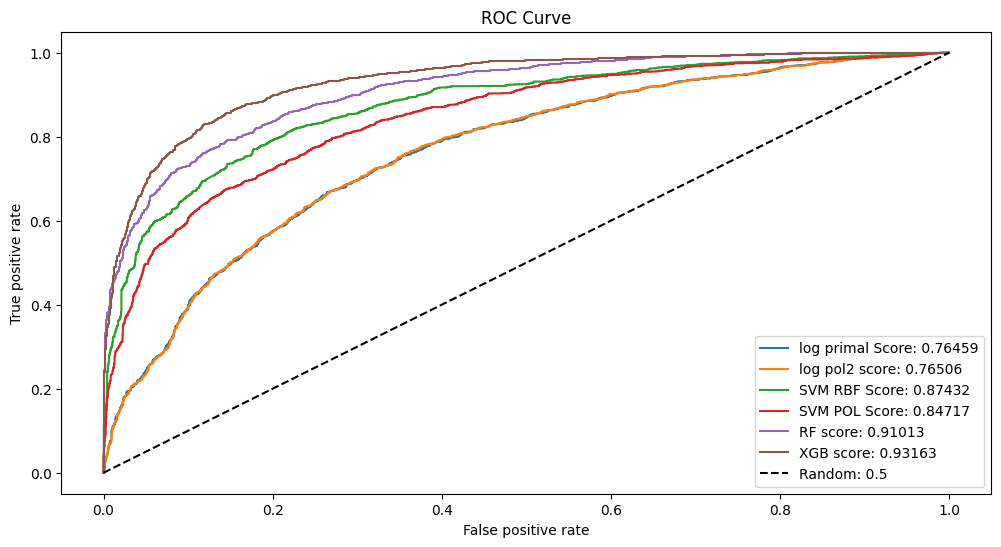

In [246]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

0.817
0.8105849582172702
0.7093596059113301
0.7607843137254902
0.8011353269973959


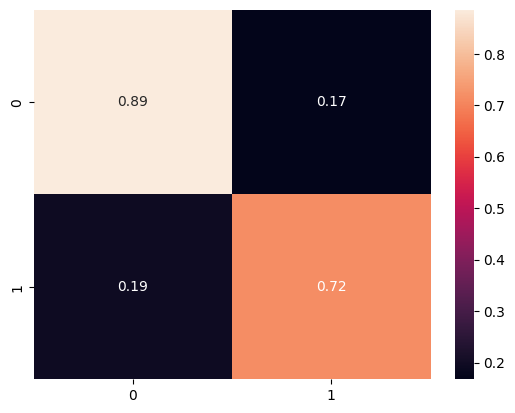

In [248]:
y_pred_xgb = xgb_grid.predict(one_hot_X_test_scaler)
c_mat = confusion_matrix(y_test,y_pred_xgb)
c_mat

sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print(accuracy_score(y_test,y_pred_xgb))
print(precision_score(y_test, y_pred_xgb))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred_xgb))
print(roc_auc_score(y_test, y_pred_xgb))

In [249]:
print(classification_report(y_test,  xgb_grid.predict(one_hot_X_test_scaler)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       594
           1       0.81      0.72      0.76       406

    accuracy                           0.82      1000
   macro avg       0.82      0.80      0.81      1000
weighted avg       0.82      0.82      0.81      1000



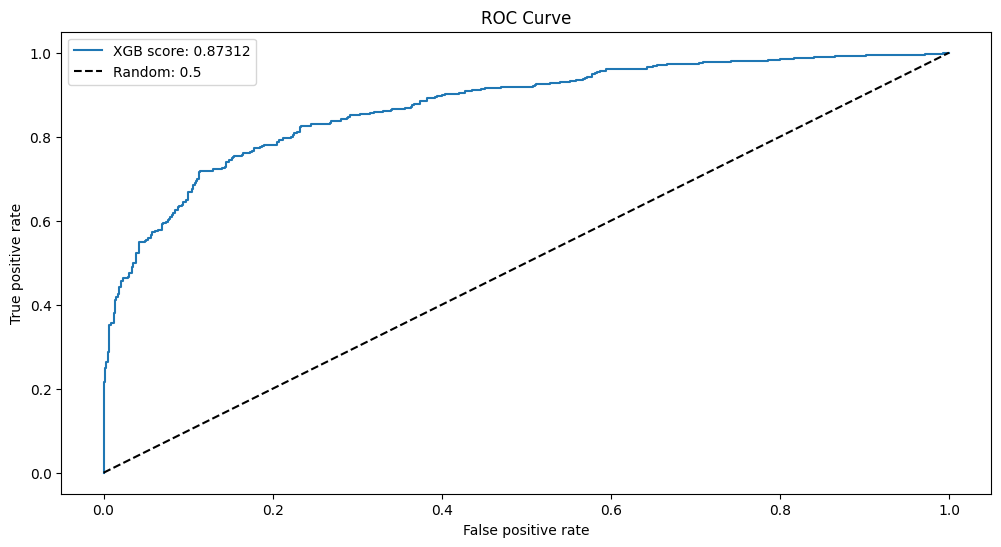

In [250]:
auc_xgb_test, fpr_xgb_test, tpr_xgb_test = get_auc_scores(y_test, xgb_grid.predict(one_hot_X_test_scaler),
                                                       xgb_grid.predict_proba(one_hot_X_test_scaler)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_xgb_test, tpr_xgb_test, label = 'XGB score: ' + str(round(auc_xgb_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

6. Resultado de los modelos sin balancear

El resultado de los modelos con los datos sin balancear no es malo, pero queremos mejorarlo balanceando los datos en train y con todo el conjunto de datos.

### Modelado con datos balanceados con SMOTE

In [157]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [251]:
one_hot_X_train_df = pd.get_dummies(X_train_df, dtype= int)
one_hot_X_test_df = pd.get_dummies(X_test_df, dtype= int)

scaler = MinMaxScaler()
one_hot_X_train_scaler_df = scaler.fit_transform(one_hot_X_train_df)
one_hot_X_test_scaler_df = scaler.transform(one_hot_X_test_df)

In [254]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(one_hot_X_train_df, y_train_df)

In [255]:
#Escalamos los datos balanceados
scaler_smote = MinMaxScaler()
one_hot_X_train_scaler_df_smote = scaler_smote.fit_transform(X_res)
one_hot_X_test_scaler_df = scaler_smote.transform(one_hot_X_test)

In [256]:
cv = RepeatedKFold(n_splits=5, n_repeats = 2, random_state=1) 

In [327]:
#Regresión logística con datos balanceados
reg_log = Pipeline([("reglog", LogisticRegression(solver = 'lbfgs'))]) 
reg_log_param = {'reglog__C': [0.1,0.5,1,10,50,100], 
                'reglog__max_iter': [250], 
                'reglog__fit_intercept':[True],
                'reglog__intercept_scaling':[1],
                'reglog__penalty':['l2'],
                'reglog__tol':[0.00001,0.0001,0.000001]}

log_primal_Grid = GridSearchCV(reg_log,reg_log_param, cv=cv, refit=True, verbose=0, n_jobs=-1)
log_primal_Grid.fit(one_hot_X_train_scaler_df_smote, y_res)

best_model = log_primal_Grid.best_estimator_
best_score = log_primal_Grid.best_score_
train_score = best_model.score(one_hot_X_train_scaler_df_smote, y_res)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: Pipeline(steps=[('reglog', LogisticRegression(C=0.1, max_iter=250, tol=1e-05))])
Puntuación de validación cruzada: 0.8389706335065202
Puntuación en el conjunto de entrenamiento: 0.8390497168030208


In [326]:
#Regresión Logística con extensión polinómica con datos balanceados
reg_log = Pipeline([("reglog", LogisticRegression(solver = 'liblinear'))]) 
reg_log_param = {'reglog__C': [0.1,10,50], 
                'reglog__max_iter': [300,500], 
                'reglog__fit_intercept':[True],
                'reglog__intercept_scaling':[1],
                'reglog__penalty':['l2'],
                'reglog__tol':[0.0001,0.000001]}

poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(one_hot_X_train)
log_pol2_Grid = GridSearchCV(reg_log,reg_log_param, cv=cv, refit=True, verbose=0, n_jobs=-1)
log_pol2_Grid.fit(one_hot_X_train_scaler_df_smote, y_res)

best_model = log_pol2_Grid.best_estimator_
best_score = log_pol2_Grid.best_score_
train_score = best_model.score(one_hot_X_train_scaler_df_smote, y_res)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: Pipeline(steps=[('reglog',
                 LogisticRegression(C=50, max_iter=300, solver='liblinear'))])
Puntuación de validación cruzada: 0.8375544257960559
Puntuación en el conjunto de entrenamiento: 0.8382630585273757


In [325]:
#Vector soporte con kernel rbf con datos balanceados
svm = Pipeline([("svm", SVC())])  
svm_param = {
    'svm__C': [0.5,100,150],
    'svm__gamma': [0.1,0.01,0.001],
    'svm__probability':[True],
    'svm__kernel': ['rbf']}

SVM_grid_rbf = GridSearchCV(svm, svm_param, cv=cv, refit=True, verbose=0, n_jobs=-1)
SVM_grid_rbf.fit(one_hot_X_train_scaler_df_smote, y_res)

best_model = SVM_grid_rbf.best_estimator_
best_score = SVM_grid_rbf.best_score_
train_score = best_model.score(one_hot_X_train_scaler_df_smote, y_res)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: Pipeline(steps=[('svm', SVC(C=150, gamma=0.1, probability=True))])
Puntuación de validación cruzada: 0.8731508378470945
Puntuación en el conjunto de entrenamiento: 0.880742605412209


In [324]:
#Vector soporte con kernel polinómico con datos balanceados
svm = Pipeline([("svm", SVC())])  
param_grid = {
    'svm__C': [0.5,1,10,50,100],
    'svm__gamma': [0.1,0.01,0.001],
    'svm__probability':[True],
    'svm__kernel': ['poly'],
    'svm__degree':[2,3]}

SVM_grid = GridSearchCV(svm, param_grid, cv=cv, refit=True, verbose=0, n_jobs=-1)
SVM_grid.fit(one_hot_X_train_scaler_df_smote, y_res)

best_model = SVM_grid.best_estimator_
best_score = SVM_grid.best_score_
train_score = best_model.score(one_hot_X_train_scaler_df_smote, y_res)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: Pipeline(steps=[('svm',
                 SVC(C=100, degree=2, gamma=0.1, kernel='poly',
                     probability=True))])
Puntuación de validación cruzada: 0.8696894608640123
Puntuación en el conjunto de entrenamiento: 0.8716960352422908


In [309]:
#RandomForest con datos balanceados
param_grid = {
    'max_depth': [3,4,5,6,7,8,9],
    'max_features': [2,4,6,7,8,9],
    'n_estimators': [50, 100],
    'min_samples_split': [3, 5, 6, 7]}


RanFor = RandomForestClassifier()
RanFor_grid = GridSearchCV(RanFor, param_grid, cv=5, refit=True, verbose=0, n_jobs=-1)
RanFor_grid.fit(one_hot_X_train_scaler_df_smote, y_res)

best_model = RanFor_grid.best_estimator_
best_score = RanFor_grid.best_score_
train_score = best_model.score(one_hot_X_train_scaler_df_smote, y_res)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: RandomForestClassifier(max_depth=9, max_features=6, min_samples_split=6,
                       n_estimators=50)
Puntuación de validación cruzada: 0.869190103315035
Puntuación en el conjunto de entrenamiento: 0.907960981749528


In [316]:
#XGBClassifier con datos balanceados
param_grid = {
    'max_depth': [5,6,7,8],
    'gamma': [0.01,0.001,0.001],
    'min_child_weight': [1,5,10],
    'learning_rate': [0.05,0.1, 0.2, 0.3],
    'n_estimators':[5,10,20,100] }


xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb, param_grid, cv=5, refit=True, verbose=0,n_jobs=-1)
xgb_grid.fit(one_hot_X_train_scaler_df_smote, y_res)

best_model = xgb_grid.best_estimator_
best_score = xgb_grid.best_score_
train_score = xgb_grid.score(one_hot_X_train_scaler_df_smote, y_res)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Puntuación de validación cruzada: 0.8896429098498742
Puntuación en el conjunto de entrenamiento: 0.9849748269351793


In [328]:
#Resultados del modelo de regresión logística
print(classification_report(y_res, log_primal_Grid.predict(one_hot_X_train_scaler_df_smote)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6356
           1       0.89      0.77      0.83      6356

    accuracy                           0.84     12712
   macro avg       0.84      0.84      0.84     12712
weighted avg       0.84      0.84      0.84     12712



In [329]:
#Resultados del modelo de regresión logística con extensión polinómica
print(classification_report(y_res, log_pol2_Grid.predict(one_hot_X_train_scaler_df_smote)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6356
           1       0.89      0.77      0.83      6356

    accuracy                           0.84     12712
   macro avg       0.84      0.84      0.84     12712
weighted avg       0.84      0.84      0.84     12712



In [330]:
#Resultados del modelo vector soporte con kernel rbf
print(classification_report(y_res, SVM_grid_rbf.predict(one_hot_X_train_scaler_df_smote)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6356
           1       0.93      0.82      0.87      6356

    accuracy                           0.88     12712
   macro avg       0.89      0.88      0.88     12712
weighted avg       0.89      0.88      0.88     12712



In [331]:
#Resultados del modelo vector soporte con kernel polinómico
print(classification_report(y_res, SVM_grid.predict(one_hot_X_train_scaler_df_smote)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6356
           1       0.93      0.80      0.86      6356

    accuracy                           0.87     12712
   macro avg       0.88      0.87      0.87     12712
weighted avg       0.88      0.87      0.87     12712



In [332]:
#Resultado del modelo randomforest
print(classification_report(y_res, RanFor_grid.predict(one_hot_X_train_scaler_df_smote)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6356
           1       0.92      0.89      0.91      6356

    accuracy                           0.91     12712
   macro avg       0.91      0.91      0.91     12712
weighted avg       0.91      0.91      0.91     12712



In [333]:
#Resultado del modelo XGB
print(classification_report(y_res, xgb_grid.predict(one_hot_X_train_scaler_df_smote)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6356
           1       0.99      0.98      0.98      6356

    accuracy                           0.98     12712
   macro avg       0.99      0.98      0.98     12712
weighted avg       0.99      0.98      0.98     12712



In [467]:
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y_res, log_primal_Grid.predict(one_hot_X_train_scaler_df_smote),log_primal_Grid.predict_proba(one_hot_X_train_scaler_df_smote)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y_res, log_pol2_Grid.predict(one_hot_X_train_scaler_df_smote),log_pol2_Grid.predict_proba(one_hot_X_train_scaler_df_smote)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y_res, SVM_grid_rbf.predict(one_hot_X_train_scaler_df_smote),SVM_grid_rbf.predict_proba(one_hot_X_train_scaler_df_smote)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y_res, SVM_grid.predict(one_hot_X_train_scaler_df_smote),SVM_grid.predict_proba(one_hot_X_train_scaler_df_smote)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y_res, RanFor_grid.predict(one_hot_X_train_scaler_df_smote),RanFor_grid.predict_proba(one_hot_X_train_scaler_df_smote)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y_res, xgb_grid.predict(one_hot_X_train_scaler_df_smote),xgb_grid.predict_proba(one_hot_X_train_scaler_df_smote)[:,1])

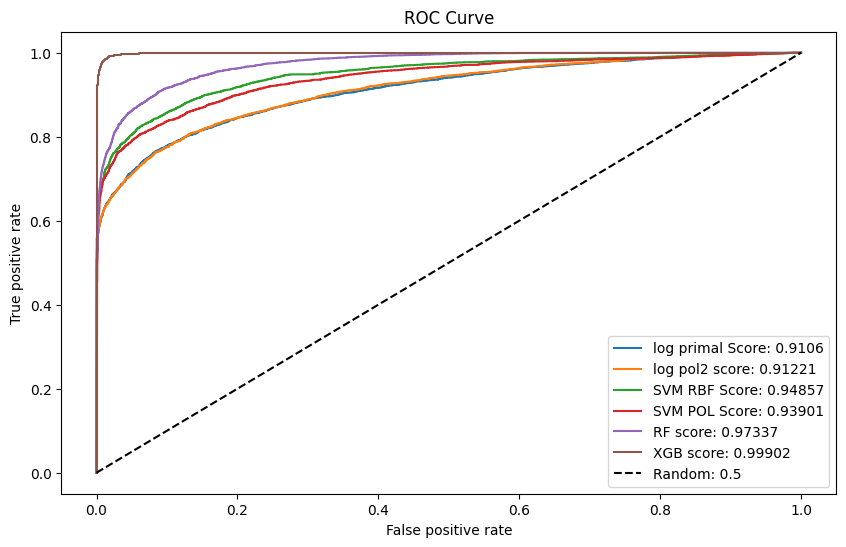

In [468]:
plt.figure(figsize = (10,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [455]:
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y_test, log_primal_Grid.predict(one_hot_X_test_scaler_df),log_primal_Grid.predict_proba(one_hot_X_test_scaler_df)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y_test, log_pol2_Grid.predict(one_hot_X_test_scaler_df),log_pol2_Grid.predict_proba(one_hot_X_test_scaler_df)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y_test, SVM_grid_rbf.predict(one_hot_X_test_scaler_df),SVM_grid_rbf.predict_proba(one_hot_X_test_scaler_df)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y_test, SVM_grid.predict(one_hot_X_test_scaler_df),SVM_grid.predict_proba(one_hot_X_test_scaler_df)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y_test, RanFor_grid.predict(one_hot_X_test_scaler_df),RanFor_grid.predict_proba(one_hot_X_test_scaler_df)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y_test, xgb_grid.predict(one_hot_X_test_scaler_df),xgb_grid.predict_proba(one_hot_X_test_scaler_df)[:,1])

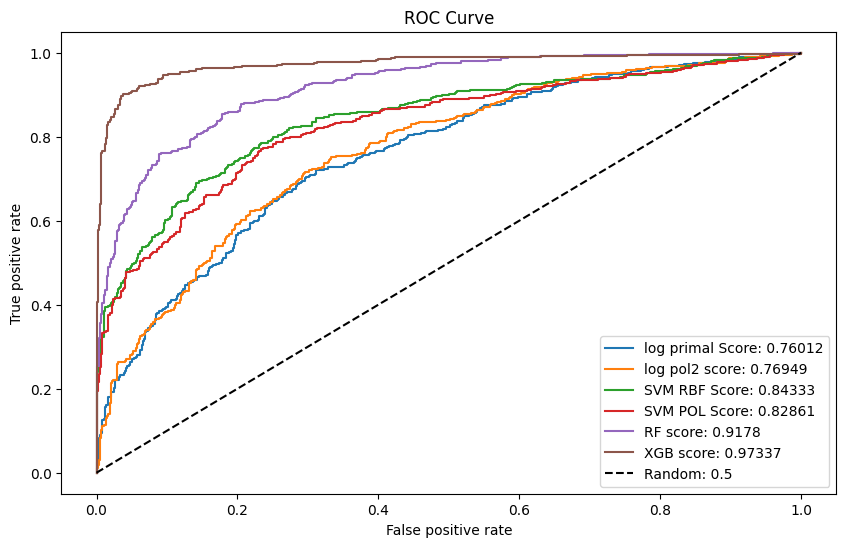

In [465]:
plt.figure(figsize = (10,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

Accuracy 0.837
Precisión 0.8738461538461538
Recall 0.7093596059113301
F1-Score 0.7770177838577291
Curva ROC 0.8152419100694963


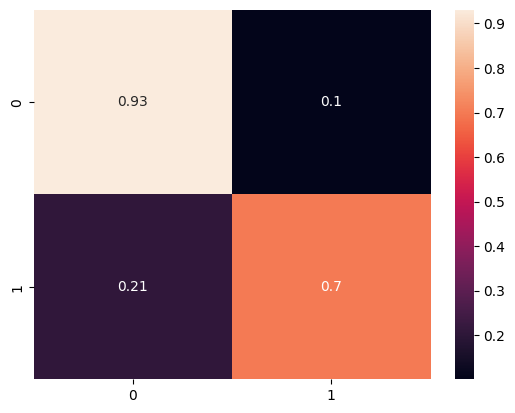

In [497]:
y_pred_xgb = RanFor_grid.predict(one_hot_X_test_scaler_df)
c_mat = confusion_matrix(y_test,y_pred_xgb)


sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print('Accuracy',accuracy_score(y_test,y_pred_xgb))
print('Precisión',precision_score(y_test, y_pred_xgb))
print('Recall',recall_score(y_test, y_pred))
print('F1-Score',f1_score(y_test, y_pred_xgb))
print('Curva ROC',roc_auc_score(y_test, y_pred_xgb))

In [458]:
print(classification_report(y_test,  RanFor_grid.predict(one_hot_X_test_scaler_df)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       594
           1       0.87      0.70      0.78       406

    accuracy                           0.84      1000
   macro avg       0.85      0.82      0.82      1000
weighted avg       0.84      0.84      0.83      1000



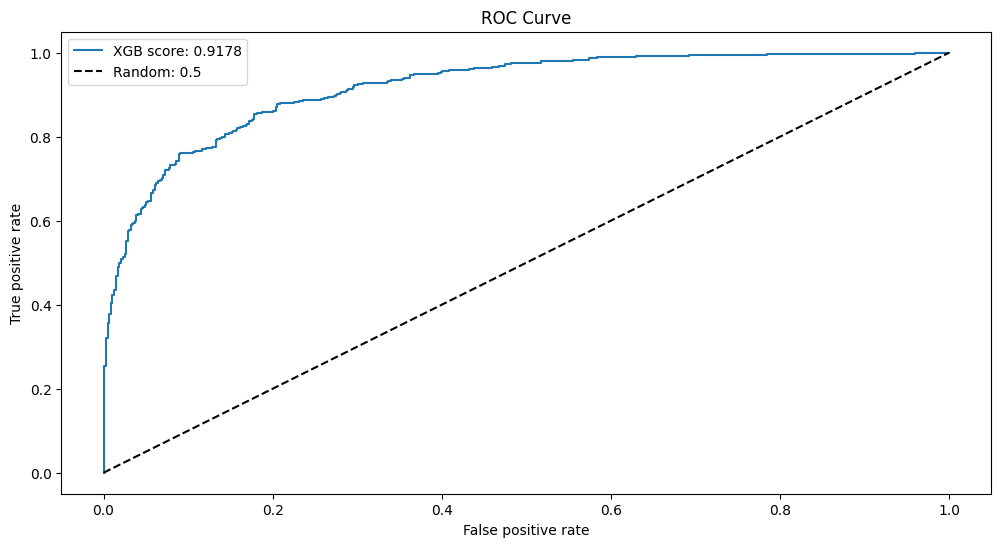

In [459]:
auc_xgb_test, fpr_xgb_test, tpr_xgb_test = get_auc_scores(y_test, RanFor_grid.predict(one_hot_X_test_scaler_df),
                                                       RanFor_grid.predict_proba(one_hot_X_test_scaler_df)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_xgb_test, tpr_xgb_test, label = 'XGB score: ' + str(round(auc_xgb_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

Curva ROC (0.87): Una curva ROC de 0.87 indica que el modelo tiene una buena capacidad para distinguir entre las clases. Esto es un buen indicio.

Accuracy en el conjunto de entrenamiento (0.86): La precisión en el conjunto de entrenamiento es ligeramente menor que la curva ROC, lo cual es normal. Esto sugiere que el modelo puede estar ligeramente ajustado a los datos de entrenamiento, pero no es un indicio claro de sobreajuste.

Accuracy en el conjunto de prueba (0.82): La precisión en el conjunto de prueba es también bastante alta y está cerca de la precisión en el conjunto de entrenamiento. Esto indica que el modelo está generalizando bien a datos no vistos.

En general, los resultados que proporcionas sugieren que el modelo está realizando bien tanto en el conjunto de entrenamiento como en el conjunto de prueba. No parece haber un sobreajuste evidente. Sin embargo, siempre es importante seguir supervisando el rendimiento del modelo y estar atento a cualquier signo de sobreajuste a medida que se ajusta y se evalúa.